In [1]:
import os, sys
#!{sys.executable} -m pip -q install palantir fa2
import warnings
warnings.filterwarnings("ignore")

In [2]:
# to avoid any possible jupyter crashes due to rpy2 not finding the R install on conda
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"

In [3]:
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir

by .GlobalEnv when processing object ‘aa’


In [4]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"

sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout

In [5]:
import matplotlib.pyplot as plt

In [6]:
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline
sc.set_figure_params()
scf.set_figure_pubready()

In [7]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']

In [8]:
data_dir = "../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/TF_modules/d2.5_d6_noMatureNeuron_filteredCellCycleGenes/"
outDir = "../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/TF_modules/d2.5_d6_noMatureNeuron_filteredCellCycleGenes_v2/"
sc.settings.figdir = os.path.join(outDir, "figures/")

In [9]:
file_path = os.path.join(data_dir, "RNAmatrix_RAd2.5_d6_noMatureNeuron_filteredCellCycleGenes.h5ad")

In [10]:
import matplotlib
print(matplotlib.matplotlib_fname())

/groups/tanaka/People/current/jiwang/local/anaconda3/envs/scFates/lib/python3.11/site-packages/matplotlib/mpl-data/matplotlibrc


In [11]:
# Load sample data
adata = sc.read(file_path, chunk_size=6000)

In [12]:
## processing steps

In [13]:
#counts = palantir.io.from_csv('https://github.com/dpeerlab/Palantir/raw/master/data/marrow_sample_scseq_counts.csv.gz')
#norm_df = sc.pp.normalize_per_cell(counts,copy=True)
#norm_df = palantir.preprocess.log_transform(norm_df)
adata

AnnData object with n_obs × n_vars = 12000 × 18610
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [14]:
adata.obsm["X_seurat_pca"] = adata.obsm["X_pca"]
adata.obsm["X_seurat_umap"] = adata.obsm["X_umap"]

In [18]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",
    # Use LaTeX default serif font.
    "font.serif": [],
    # Use specific cursive fonts.
    "font.cursive": ["Comic Neue", "Comic Sans MS"],
})

In [25]:
import matplotlib as mpl
print(mpl.get_cachedir())

/users/jingkui.wang/.cache/matplotlib


normalizing counts per cell
    finished (0:00:00)


findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because none of the following families were found: 
findfont: Generic family 'serif' not found because

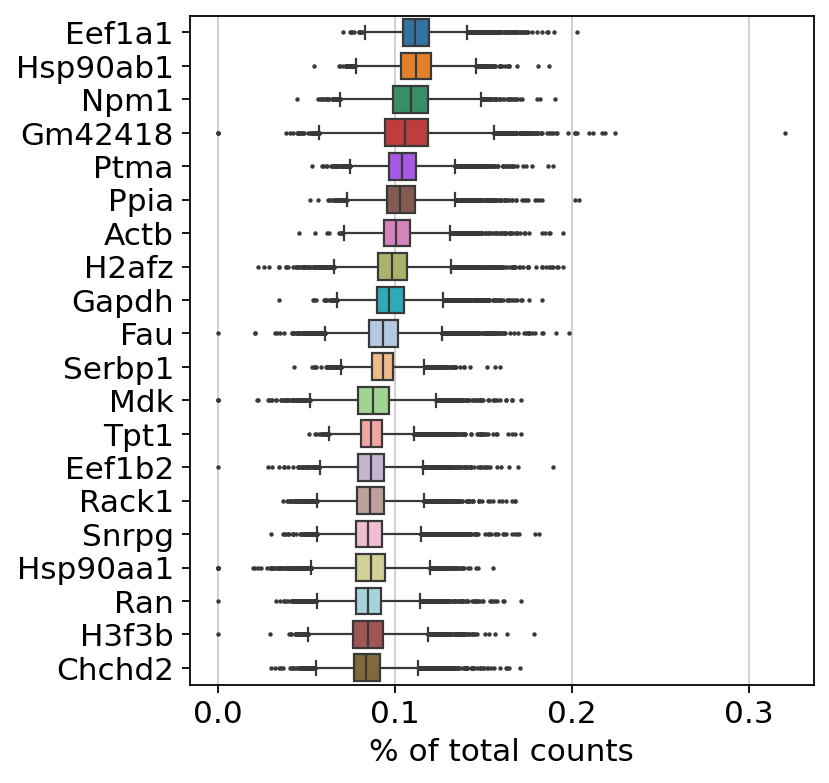

In [19]:
# basic filtering from scanpy, original code from https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=5)

In [26]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells'
    obsm: 'X_pca', 'X_umap', 'X_seurat_pca', 'X_seurat_umap'
    varm: 'PCs'

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.normalize_per_cell(adata)
#palantir.preprocess.log_transform(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [16]:
#adata=sc.AnnData(norm_df)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, flavor='cell_ranger')
sc.pp.pca(adata, n_comps = 50)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


In [17]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat'
    varm: 'PCs'

In [18]:
pca_projections = pd.DataFrame(adata.obsm["X_pca_seurat"],index=adata.obs_names)

In [19]:
dm_res = palantir.utils.run_diffusion_maps(pca_projections)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)


In [20]:
ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=None)
ms_data

0         1         2
AAACCCATCGAGGCAA-1_1_1_1_1_1_1_1 -0.428586 -0.245439 -0.040586
AAACGAACATTGCTGA-1_1_1_1_1_1_1_1 -0.417956 -0.237671 -0.040384
AAACGAAGTATCGATC-1_1_1_1_1_1_1_1 -0.393201 -0.206729 -0.028601
AAACGCTCAGAGTAAT-1_1_1_1_1_1_1_1 -0.350922 -0.180479 -0.031349
AAAGAACAGCAACAGC-1_1_1_1_1_1_1_1 -0.350811 -0.178094 -0.032516
...                                    ...       ...       ...
TTTGGTTTCGTTGTAG-1_2              0.233982 -0.001776 -0.308356
TTTGGTTTCTTCGTAT-1_2              0.323887 -0.106799  0.083679
TTTGTTGAGATTGTGA-1_2              0.207731 -0.002846 -0.265866
TTTGTTGAGTCACTGT-1_2              0.491801 -0.330035  0.146928
TTTGTTGCACTAACGT-1_2              0.215109  0.011650 -0.316918

[12000 rows x 3 columns]

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:30)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

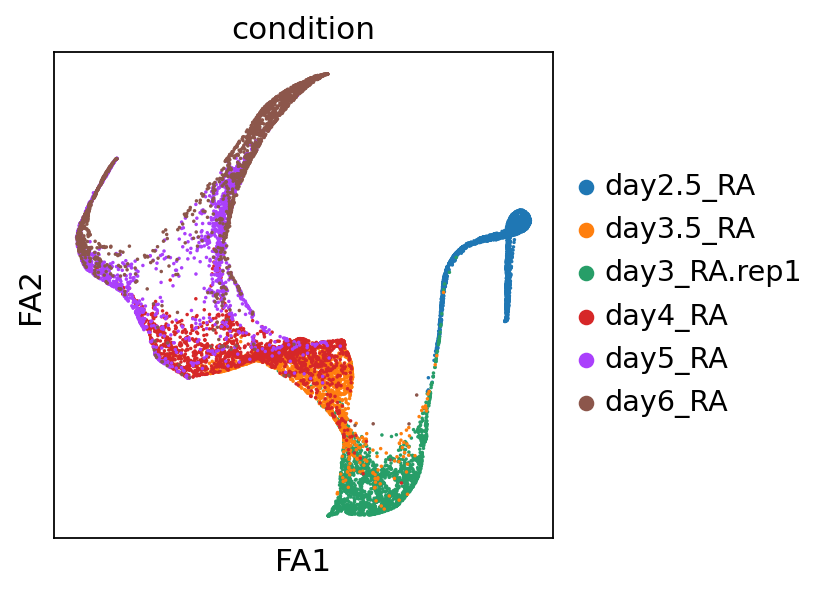

In [21]:
# generate neighbor draph in multiscale diffusion space
adata.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_palantir")
# draw ForceAtlas2 embedding using 2 first PCs as initial positions
adata.obsm["X_pca2d"]=adata.obsm["X_umap_seurat"][:,:2]
sc.tl.draw_graph(adata, init_pos='X_pca2d')
sc.pl.draw_graph(adata, color="condition",color_map="RdBu_r")

In [22]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'draw_graph', 'condition_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat', 'X_palantir', 'X_pca2d', 'X_draw_graph_fa'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

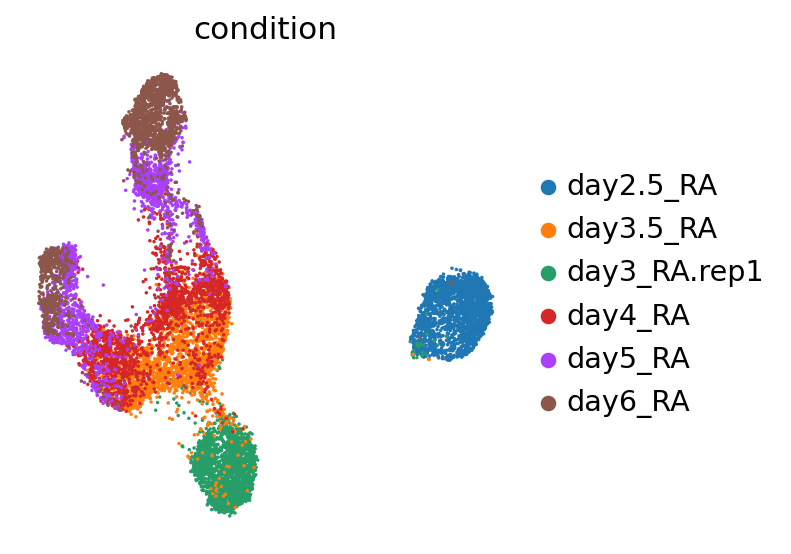

In [24]:
sc.pl.embedding(
    adata,
    basis="umap",
    color = 'condition',
    frameon=False,
)

In [ ]:
#Tree learning with SimplePPT

In [55]:
scf.tl.tree(adata,method="ppt", Nodes=100, use_rep="umap",
            device="cpu",
            seed=1,
            ppt_lambda=2000,
            ppt_sigma=0.2,
            ppt_nsteps=200)

inferring a principal tree --> parameters used 
    100 principal points, sigma = 0.2, lambda = 2000, metric = euclidean
    fitting:  14%|█▍        | 28/200 [00:02<00:13, 12.99it/s]
    converged
    finished (0:00:02) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

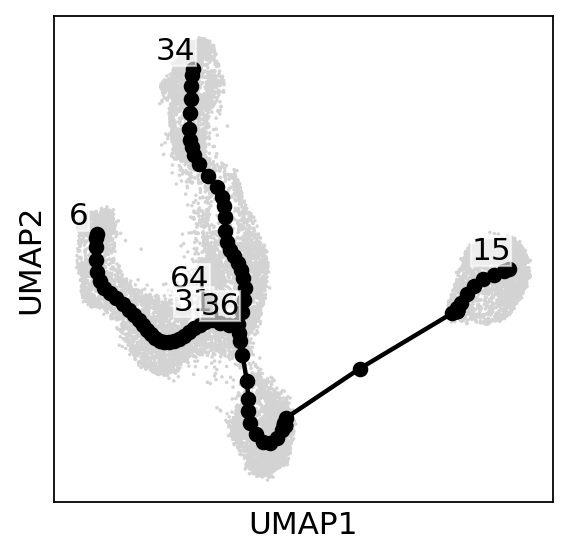

In [56]:
adata
# projecting results onto ForceAtlas2 embedding
scf.pl.graph(adata, basis = 'umap')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

    graph cleaned --> removed 6 principal points


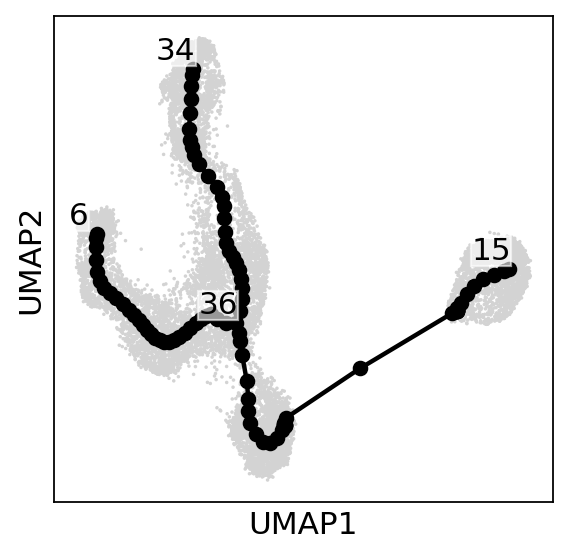

In [57]:
scf.tl.cleanup(adata,minbranchlength=10);
scf.pl.graph(adata, basis = 'umap')

In [58]:
# Selecting a root and computing pseudotime
# Using CD34 marker, we can confidently tell that the tip 163 is the root.
scf.tl.root(adata, 15)

node 15 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [59]:
# Here we are going to generate 100 mappings of pseudotime, to account for cell asssignment uncertainty. 
# to .obs will be saved the mean of all calculated pseudotimes.
# exmaple data takes > 360G memory and 16 nodes
scf.tl.pseudotime(adata, seed=42, n_jobs=20,n_map=100)

projecting cells onto the principal graph
    mappings:   0%|          | 0/100 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    mappings: 100%|██████████| 100/100 [02:17<00:00,  1.38s/it]
    finished (0:02:24) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [60]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'draw_graph', 'condition_colors', 'graph', 'ppt', 'pseudotime_list', 'milestones_colors', 'seg_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat', 'X_palantir', 'X_pca2d', 'X_draw_graph_fa', 'X_R'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [61]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5.h5ad'), compression="gzip")

In [9]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5.h5ad'),chunk_size=6000)

In [62]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'draw_graph', 'condition_colors', 'graph', 'ppt', 'pseudotime_list', 'milestones_colors', 'seg_colors'
    obsm: 'X_pca', 'X_umap', 'X_pca_seurat', 'X_umap_seurat', 'X_palantir', 'X_pca2d', 'X_draw_graph_fa', 'X_R'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


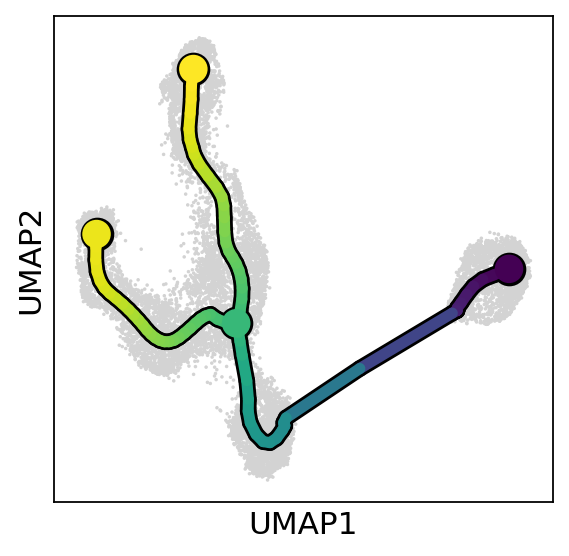

In [64]:
# Representing the trajectory and tree on top of existing embedding
scf.pl.trajectory(adata, basis = 'umap')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

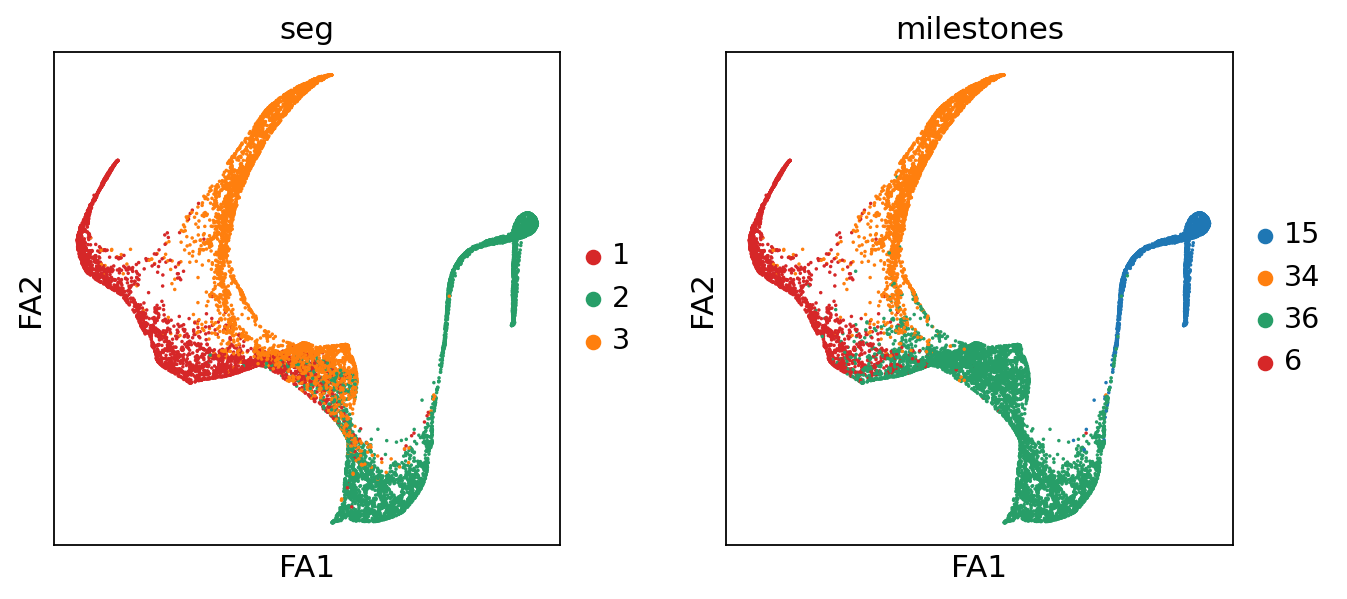

In [67]:
sc.pl.draw_graph(adata,color=["seg","milestones"])

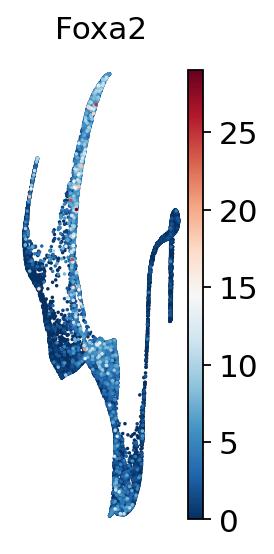

In [82]:
sc.pl.draw_graph(adata,color="Foxa2",color_map="RdBu_r")

In [73]:
scf.tl.rename_milestones(adata,["Root","FP","Bifu","NP"])
# we change the color of the root milestone for better visualisations
adata.uns["milestones_colors"][3]="#17bece"

In [74]:
from pathlib import Path
Path(os.path.join(outDir, "figures/")).mkdir(parents=True, exist_ok=True)

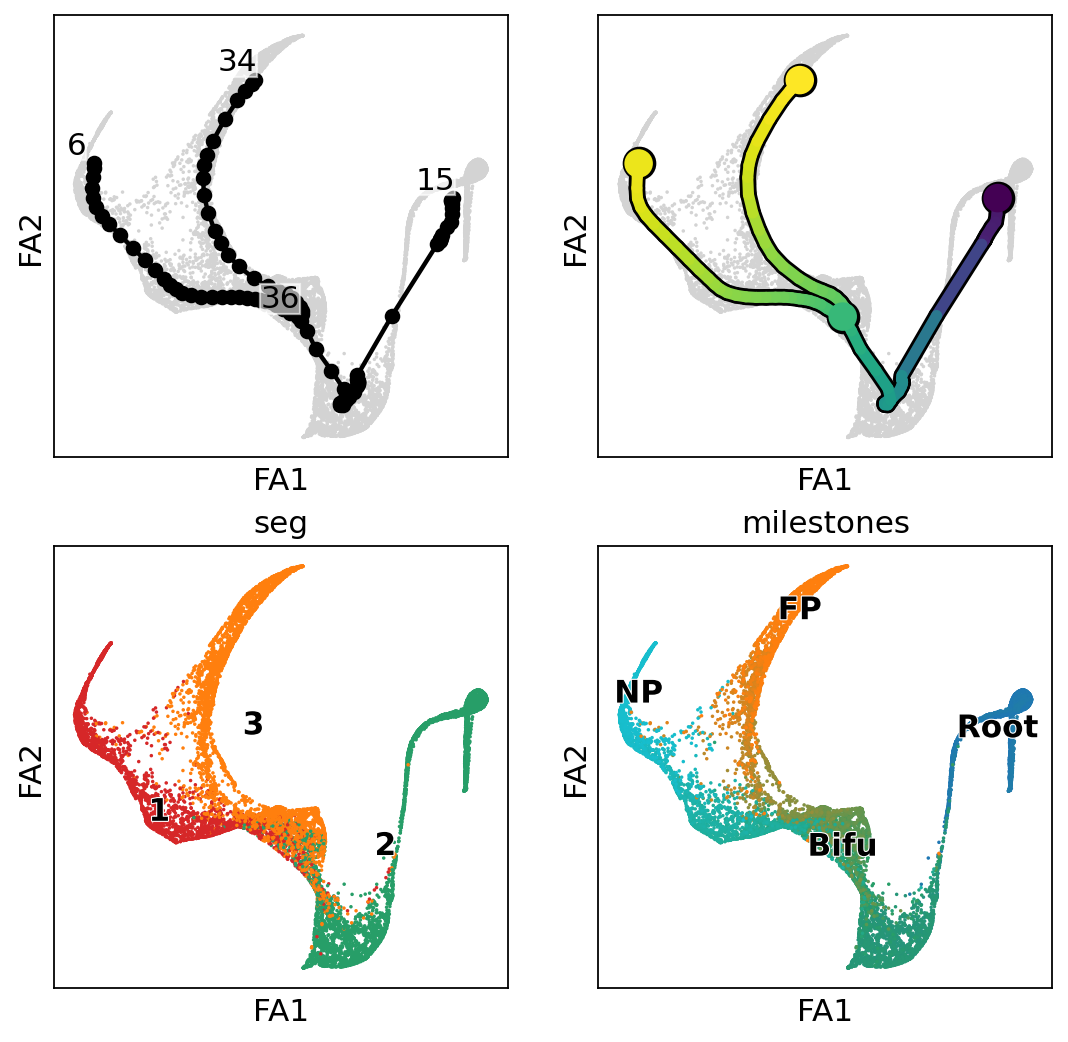

In [75]:
sc.set_figure_params()
fig, axs=plt.subplots(2,2,figsize=(8,8))
axs=axs.ravel()
scf.pl.graph(adata,basis="draw_graph_fa",show=False,ax=axs[0])
scf.pl.trajectory(adata,basis="draw_graph_fa",show=False,ax=axs[1])
sc.pl.draw_graph(adata,color=["seg"],legend_loc="on data",show=False,ax=axs[2],legend_fontoutline=True)
scf.pl.milestones(adata,ax=axs[3],show=False,annotate=True)
plt.savefig(os.path.join(outDir, "figures/A.pdf"),dpi=300)

In [76]:
# as a dendrogram representation (take some 5-10 minutes)
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 3/3 [04:45<00:00, 95.28s/it] 
    finished (0:04:45) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


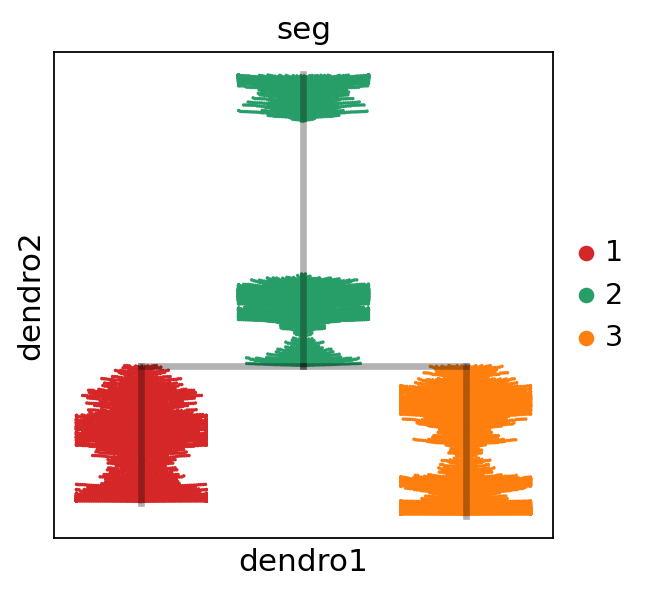

In [77]:
scf.pl.dendrogram(adata,color="seg")

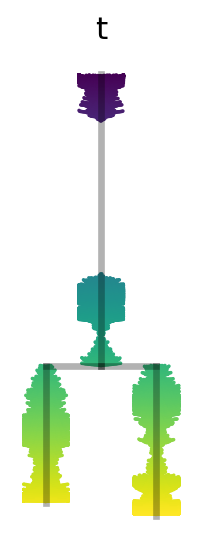

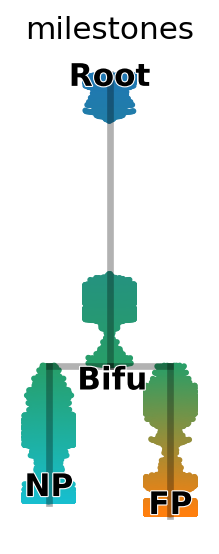

In [78]:
sc.set_figure_params(figsize=(1.5,4),frameon=False,dpi_save=300)
scf.pl.dendrogram(adata,color="t",show_info=False,
                  save="B1.pdf",
                  cmap="viridis")
scf.pl.dendrogram(adata,color="milestones",legend_loc="on data",
                  color_milestones=True,legend_fontoutline=True, 
                  save="B2.pdf")


In [79]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_before.test.asssociation.h5ad'), compression="gzip")

In [13]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_before.test.asssociation.h5ad'),chunk_size=6000)

In [14]:
# Test and fit features associated with the tree
scf.tl.test_association(adata,n_jobs=20, A_cut=0.7)

test features for association with the trajectory
    single mapping :   0%|          | 0/18369 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 2/18369 [01:14<189:18:48, 37.11s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 34/18369 [01:19<11:55:46,  2.34s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 39/18369 [01:20<10:29:58,  2.06s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 41/18369 [01:20<10:02:58,  1.97s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 44/18369 [01:21<9:24:07,  1.85s/it] 

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 48/18369 [01:21<8:39:47,  1.70s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 101/18369 [02:14<6:45:44,  1.33s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 209/18369 [02:53<4:11:00,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 211/18369 [03:18<4:44:35,  1.06it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 212/18369 [03:24<4:52:02,  1.04it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 214/18369 [03:37<5:07:04,  1.01s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|▏         | 263/18369 [03:56<4:31:03,  1.11it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 340/18369 [04:29<3:58:23,  1.26it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 342/18369 [04:50<4:14:47,  1.18it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 345/18369 [05:04<4:25:12,  1.13it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 351/18369 [05:11<4:26:49,  1.13it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 448/18369 [05:49<3:52:41,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 475/18369 [06:10<3:52:44,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 476/18369 [06:31<4:05:23,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 480/18369 [06:38<4:07:12,  1.21it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 484/18369 [06:50<4:12:47,  1.18it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 485/18369 [06:55<4:15:37,  1.17it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 543/18369 [07:17<3:59:14,  1.24it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 595/18369 [07:24<3:41:08,  1.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 598/18369 [07:36<3:46:10,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 607/18369 [08:00<3:54:22,  1.26it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 608/18369 [08:06<3:56:58,  1.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 615/18369 [08:18<3:59:54,  1.23it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 616/18369 [08:31<4:05:30,  1.21it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 640/18369 [08:45<4:02:31,  1.22it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 699/18369 [08:57<3:46:27,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 724/18369 [09:13<3:44:43,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 727/18369 [09:19<3:46:25,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 733/18369 [09:26<3:47:06,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 740/18369 [09:32<3:47:08,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 743/18369 [09:41<3:50:00,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 749/18369 [10:01<3:55:48,  1.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 756/18369 [10:07<3:55:48,  1.24it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   4%|▍         | 762/18369 [10:14<3:56:38,  1.24it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 850/18369 [10:34<3:37:49,  1.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 858/18369 [10:45<3:39:27,  1.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 860/18369 [10:53<3:41:46,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 862/18369 [11:01<3:44:04,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 874/18369 [11:17<3:46:07,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 878/18369 [11:25<3:47:35,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 883/18369 [11:38<3:50:39,  1.26it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 884/18369 [11:45<3:52:43,  1.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▍         | 886/18369 [11:51<3:53:56,  1.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 931/18369 [12:06<3:46:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 983/18369 [12:28<3:40:40,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 994/18369 [12:42<3:42:06,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 1002/18369 [12:50<3:42:41,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 1009/18369 [13:05<3:45:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   5%|▌         | 1010/18369 [13:12<3:46:59,  1.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1012/18369 [13:20<3:48:43,  1.26it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1019/18369 [13:32<3:50:36,  1.25it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1140/18369 [14:34<3:40:22,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1141/18369 [14:41<3:41:51,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1143/18369 [14:49<3:43:28,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1145/18369 [14:55<3:44:32,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   6%|▌         | 1147/18369 [15:01<3:45:40,  1.27it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1239/18369 [15:34<3:35:13,  1.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1241/18369 [15:42<3:36:51,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1267/18369 [15:55<3:35:01,  1.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1273/18369 [16:02<3:35:25,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1276/18369 [16:10<3:36:37,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1278/18369 [16:29<3:40:29,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   7%|▋         | 1284/18369 [16:35<3:40:46,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1379/18369 [17:08<3:31:07,  1.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1387/18369 [17:17<3:31:44,  1.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1394/18369 [17:24<3:31:54,  1.34it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1398/18369 [17:33<3:33:14,  1.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1405/18369 [17:57<3:36:46,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1406/18369 [18:04<3:37:58,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1407/18369 [18:13<3:39:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1411/18369 [18:25<3:41:25,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1508/18369 [18:58<3:32:12,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1510/18369 [19:05<3:33:14,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1526/18369 [19:14<3:32:20,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1528/18369 [19:20<3:33:07,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1538/18369 [19:48<3:36:46,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   8%|▊         | 1540/18369 [19:54<3:37:33,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1629/18369 [20:22<3:29:23,  1.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1650/18369 [20:44<3:30:12,  1.33it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1653/18369 [20:59<3:32:19,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1657/18369 [21:13<3:34:03,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1661/18369 [21:21<3:34:50,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :   9%|▉         | 1679/18369 [21:34<3:34:31,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1780/18369 [22:08<3:26:17,  1.34it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1787/18369 [22:27<3:28:23,  1.33it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1792/18369 [22:35<3:28:55,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1796/18369 [22:43<3:29:41,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|▉         | 1799/18369 [22:50<3:30:25,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1841/18369 [23:28<3:30:43,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1913/18369 [24:04<3:27:01,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1920/18369 [24:25<3:29:19,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1924/18369 [24:39<3:30:45,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1925/18369 [24:45<3:31:33,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  10%|█         | 1927/18369 [24:51<3:32:08,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 1932/18369 [24:58<3:32:28,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2023/18369 [25:30<3:26:04,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2038/18369 [25:38<3:25:29,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2043/18369 [25:47<3:26:04,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2054/18369 [26:10<3:27:57,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█         | 2057/18369 [26:17<3:28:29,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  11%|█▏        | 2079/18369 [26:52<3:30:38,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2158/18369 [27:18<3:25:07,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2180/18369 [27:27<3:23:57,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2181/18369 [27:38<3:25:09,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2184/18369 [27:46<3:25:46,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2187/18369 [28:09<3:28:22,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  12%|█▏        | 2189/18369 [28:22<3:29:41,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2301/18369 [29:04<3:23:02,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2305/18369 [29:21<3:24:34,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2313/18369 [29:28<3:24:35,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2314/18369 [29:34<3:25:11,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2315/18369 [29:53<3:27:20,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2316/18369 [29:59<3:27:52,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2416/18369 [30:32<3:21:43,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2430/18369 [30:43<3:21:28,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2435/18369 [30:50<3:21:48,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2437/18369 [31:03<3:23:04,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2442/18369 [31:17<3:24:04,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2445/18369 [31:22<3:24:22,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  13%|█▎        | 2457/18369 [31:43<3:25:29,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▎        | 2519/18369 [31:56<3:21:00,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2555/18369 [32:13<3:19:30,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2556/18369 [32:23<3:20:24,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2562/18369 [32:30<3:20:36,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2572/18369 [32:39<3:20:35,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2576/18369 [33:03<3:22:43,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2579/18369 [33:10<3:23:05,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  14%|█▍        | 2661/18369 [33:50<3:19:48,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2695/18369 [34:01<3:17:53,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2698/18369 [34:10<3:18:28,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2702/18369 [34:16<3:18:45,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2703/18369 [34:30<3:19:58,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2704/18369 [34:36<3:20:29,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▍        | 2714/18369 [35:08<3:22:42,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2788/18369 [35:28<3:18:16,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2801/18369 [35:39<3:18:13,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2807/18369 [35:51<3:18:48,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2824/18369 [36:00<3:18:14,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2826/18369 [36:07<3:18:39,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2835/18369 [36:23<3:19:26,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  15%|█▌        | 2838/18369 [36:38<3:20:29,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2880/18369 [36:53<3:18:26,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2900/18369 [37:02<3:17:33,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2956/18369 [37:33<3:15:47,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2962/18369 [37:53<3:17:08,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2964/18369 [38:10<3:18:26,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  16%|█▌        | 2976/18369 [38:24<3:18:40,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3077/18369 [39:01<3:13:55,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3091/18369 [39:07<3:13:22,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3096/18369 [39:15<3:13:40,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3100/18369 [39:29<3:14:33,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3102/18369 [39:50<3:16:07,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3105/18369 [39:57<3:16:24,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3141/18369 [40:17<3:15:22,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3210/18369 [40:41<3:12:08,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  17%|█▋        | 3214/18369 [40:47<3:12:20,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3218/18369 [40:53<3:12:32,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3223/18369 [41:10<3:13:30,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3227/18369 [41:27<3:14:33,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3232/18369 [41:40<3:15:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3262/18369 [41:46<3:13:30,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3333/18369 [42:06<3:09:57,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3342/18369 [42:21<3:10:29,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3343/18369 [42:29<3:10:58,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3358/18369 [42:43<3:10:58,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3369/18369 [43:03<3:11:42,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3373/18369 [43:11<3:12:00,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  18%|█▊        | 3376/18369 [43:23<3:12:41,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▊        | 3420/18369 [43:31<3:10:16,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3474/18369 [43:53<3:08:10,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3482/18369 [44:00<3:08:10,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3486/18369 [44:15<3:08:56,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3493/18369 [44:32<3:09:41,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3495/18369 [44:46<3:10:32,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3498/18369 [44:52<3:10:45,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 3505/18369 [45:04<3:11:09,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3610/18369 [45:40<3:06:45,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3611/18369 [45:47<3:07:10,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3613/18369 [45:54<3:07:29,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3624/18369 [46:02<3:07:19,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3629/18369 [46:16<3:07:58,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3634/18369 [46:36<3:08:58,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|█▉        | 3635/18369 [46:44<3:09:28,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3738/18369 [47:11<3:04:41,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3740/18369 [47:20<3:05:11,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3752/18369 [47:38<3:05:35,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3753/18369 [47:45<3:05:58,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3759/18369 [47:51<3:06:02,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3761/18369 [48:02<3:06:36,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  20%|██        | 3762/18369 [48:15<3:07:23,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3766/18369 [48:23<3:07:40,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3885/18369 [49:04<3:02:56,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3887/18369 [49:13<3:03:23,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3889/18369 [49:22<3:03:51,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3892/18369 [49:29<3:04:06,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3894/18369 [49:36<3:04:23,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3895/18369 [49:42<3:04:43,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██        | 3897/18369 [49:57<3:05:32,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4019/18369 [50:44<3:01:08,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4023/18369 [51:01<3:01:58,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4024/18369 [51:15<3:02:43,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4027/18369 [51:30<3:03:25,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4029/18369 [51:36<3:03:39,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  22%|██▏       | 4068/18369 [51:51<3:02:19,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4152/18369 [52:33<2:59:57,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4153/18369 [52:41<3:00:22,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4155/18369 [52:41<3:00:15,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4158/18369 [52:56<3:00:56,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4161/18369 [53:04<3:01:14,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4164/18369 [53:12<3:01:30,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4167/18369 [53:19<3:01:44,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4226/18369 [53:45<2:59:53,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4277/18369 [53:55<2:57:41,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4281/18369 [54:12<2:58:22,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4285/18369 [54:27<2:58:59,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4289/18369 [54:49<2:59:59,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 4294/18369 [55:03<3:00:28,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▎       | 4323/18369 [55:19<2:59:44,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4413/18369 [55:40<2:56:05,  1.32it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4415/18369 [55:50<2:56:28,  1.32it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4419/18369 [56:06<2:57:07,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4420/18369 [56:13<2:57:26,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4423/18369 [56:27<2:58:01,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4424/18369 [56:36<2:58:25,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  24%|██▍       | 4428/18369 [56:44<2:58:39,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4519/18369 [57:26<2:56:01,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4540/18369 [57:35<2:55:25,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4545/18369 [57:46<2:55:42,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4549/18369 [57:53<2:55:52,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4550/18369 [58:17<2:57:03,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▍       | 4553/18369 [58:24<2:57:15,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4644/18369 [59:07<2:54:43,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4665/18369 [59:23<2:54:26,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4679/18369 [59:47<2:54:56,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  25%|██▌       | 4683/18369 [1:00:00<2:55:23,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4686/18369 [1:00:13<2:55:50,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4758/18369 [1:00:38<2:53:28,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4776/18369 [1:00:47<2:53:02,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4784/18369 [1:01:06<2:53:32,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4798/18369 [1:01:13<2:53:10,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4801/18369 [1:01:20<2:53:20,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4804/18369 [1:01:28<2:53:35,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4806/18369 [1:01:35<2:53:48,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▌       | 4809/18369 [1:01:48<2:54:17,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  26%|██▋       | 4825/18369 [1:02:03<2:54:10,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4905/18369 [1:02:24<2:51:17,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4927/18369 [1:02:33<2:50:39,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4931/18369 [1:02:42<2:50:52,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4936/18369 [1:02:50<2:51:02,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4937/18369 [1:02:59<2:51:23,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4942/18369 [1:03:14<2:51:48,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 4950/18369 [1:03:51<2:53:05,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5032/18369 [1:04:20<2:50:32,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5039/18369 [1:04:30<2:50:37,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  27%|██▋       | 5048/18369 [1:04:38<2:50:35,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5052/18369 [1:04:47<2:50:46,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5064/18369 [1:05:09<2:51:10,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5068/18369 [1:05:22<2:51:33,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5073/18369 [1:05:29<2:51:39,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5151/18369 [1:05:50<2:48:56,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5178/18369 [1:06:06<2:48:24,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5180/18369 [1:06:15<2:48:42,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5190/18369 [1:06:21<2:48:30,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5195/18369 [1:06:36<2:48:55,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5196/18369 [1:06:43<2:49:08,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5200/18369 [1:06:54<2:49:27,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5202/18369 [1:07:02<2:49:42,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 5205/18369 [1:07:12<2:49:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5308/18369 [1:07:43<2:46:38,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5311/18369 [1:07:50<2:46:47,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5317/18369 [1:07:57<2:46:48,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5319/18369 [1:08:04<2:47:01,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5324/18369 [1:08:11<2:47:05,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5328/18369 [1:08:19<2:47:14,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5330/18369 [1:08:26<2:47:26,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5332/18369 [1:08:32<2:47:35,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 5333/18369 [1:08:45<2:48:03,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5425/18369 [1:09:14<2:45:13,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5438/18369 [1:09:25<2:45:04,  1.31it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5451/18369 [1:09:35<2:44:54,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5454/18369 [1:09:42<2:45:03,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5466/18369 [1:09:49<2:44:49,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5476/18369 [1:10:03<2:44:55,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|██▉       | 5482/18369 [1:10:39<2:46:06,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5573/18369 [1:11:13<2:43:33,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5579/18369 [1:11:20<2:43:33,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5593/18369 [1:11:28<2:43:16,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5597/18369 [1:11:37<2:43:26,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5601/18369 [1:11:43<2:43:30,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  30%|███       | 5602/18369 [1:11:52<2:43:49,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5604/18369 [1:11:58<2:43:57,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5605/18369 [1:12:16<2:44:35,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5673/18369 [1:12:40<2:42:39,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5727/18369 [1:13:09<2:41:30,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5728/18369 [1:13:16<2:41:43,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5730/18369 [1:13:24<2:41:55,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5731/18369 [1:13:31<2:42:08,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5733/18369 [1:13:39<2:42:20,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███       | 5736/18369 [1:13:45<2:42:27,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5745/18369 [1:13:53<2:42:22,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  31%|███▏      | 5746/18369 [1:14:00<2:42:36,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5811/18369 [1:14:27<2:40:54,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5844/18369 [1:14:35<2:39:51,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5864/18369 [1:14:47<2:39:29,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5866/18369 [1:14:56<2:39:44,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5869/18369 [1:15:11<2:40:09,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5875/18369 [1:15:26<2:40:25,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5878/18369 [1:15:53<2:41:16,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  32%|███▏      | 5893/18369 [1:16:00<2:40:55,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 5991/18369 [1:16:29<2:38:03,  1.31it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 5995/18369 [1:16:36<2:38:08,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 5999/18369 [1:16:45<2:38:16,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6003/18369 [1:17:00<2:38:37,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6006/18369 [1:17:15<2:39:02,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6007/18369 [1:17:29<2:39:27,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6128/18369 [1:18:26<2:36:41,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6130/18369 [1:18:32<2:36:49,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6135/18369 [1:18:40<2:36:52,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6136/18369 [1:18:46<2:37:02,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  33%|███▎      | 6140/18369 [1:18:55<2:37:12,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▎      | 6189/18369 [1:19:25<2:36:18,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6263/18369 [1:20:04<2:34:46,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6268/18369 [1:20:20<2:35:06,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6270/18369 [1:20:35<2:35:30,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6273/18369 [1:20:42<2:35:36,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6276/18369 [1:20:49<2:35:44,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 6333/18369 [1:21:15<2:34:25,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6370/18369 [1:21:33<2:33:37,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6381/18369 [1:21:41<2:33:27,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6395/18369 [1:21:48<2:33:10,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6397/18369 [1:22:03<2:33:33,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6401/18369 [1:22:09<2:33:36,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6405/18369 [1:22:16<2:33:41,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6406/18369 [1:22:24<2:33:53,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6408/18369 [1:22:32<2:34:03,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6410/18369 [1:22:40<2:34:15,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▍      | 6419/18369 [1:22:48<2:34:08,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  35%|███▌      | 6430/18369 [1:22:56<2:34:00,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6626/18369 [1:24:46<2:30:15,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6633/18369 [1:25:02<2:30:27,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▌      | 6657/18369 [1:25:17<2:30:04,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6680/18369 [1:25:48<2:30:09,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  36%|███▋      | 6687/18369 [1:26:03<2:30:20,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6713/18369 [1:26:20<2:29:54,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6745/18369 [1:26:30<2:29:04,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6777/18369 [1:26:45<2:28:23,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6788/18369 [1:27:03<2:28:31,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6792/18369 [1:27:11<2:28:37,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6796/18369 [1:27:27<2:28:56,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6806/18369 [1:27:48<2:29:10,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 6841/18369 [1:28:02<2:28:21,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6893/18369 [1:28:22<2:27:07,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6908/18369 [1:28:29<2:26:48,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6914/18369 [1:28:39<2:26:52,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6921/18369 [1:28:45<2:26:49,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6923/18369 [1:28:53<2:26:57,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6924/18369 [1:29:08<2:27:20,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6925/18369 [1:29:14<2:27:28,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6928/18369 [1:29:21<2:27:33,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 6930/18369 [1:29:29<2:27:42,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7014/18369 [1:30:00<2:25:42,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7041/18369 [1:30:19<2:25:18,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7044/18369 [1:30:28<2:25:27,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7047/18369 [1:30:36<2:25:33,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7052/18369 [1:30:44<2:25:37,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7053/18369 [1:31:07<2:26:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  38%|███▊      | 7057/18369 [1:31:24<2:26:30,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7176/18369 [1:32:05<2:23:39,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7188/18369 [1:32:32<2:23:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 7189/18369 [1:32:56<2:24:31,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 7300/18369 [1:33:55<2:22:25,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 7311/18369 [1:34:05<2:22:19,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 7314/18369 [1:34:21<2:22:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 7317/18369 [1:34:29<2:22:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|███▉      | 7320/18369 [1:34:37<2:22:49,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7414/18369 [1:35:15<2:20:44,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7428/18369 [1:35:32<2:20:43,  1.30it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  40%|████      | 7429/18369 [1:35:43<2:20:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
 namespace ‘Seurat’ is not available and has been replaced
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7445/18369 [1:35:59<2:20:50,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7450/18369 [1:36:05<2:20:50,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7454/18369 [1:36:25<2:21:11,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7539/18369 [1:37:02<2:19:24,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7551/18369 [1:37:17<2:19:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7555/18369 [1:37:31<2:19:35,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7568/18369 [1:37:38<2:19:21,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7571/18369 [1:37:54<2:19:38,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████      | 7573/18369 [1:38:01<2:19:44,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  41%|████▏     | 7594/18369 [1:38:14<2:19:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7689/18369 [1:38:59<2:17:30,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7708/18369 [1:39:30<2:17:38,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7715/18369 [1:39:51<2:17:54,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7718/18369 [1:39:57<2:17:56,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 7771/18369 [1:40:06<2:16:31,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7827/18369 [1:40:33<2:15:26,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7829/18369 [1:40:44<2:15:37,  1.30it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7835/18369 [1:41:02<2:15:51,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7840/18369 [1:41:25<2:16:13,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7846/18369 [1:41:41<2:16:22,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7938/18369 [1:42:16<2:14:24,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7945/18369 [1:42:25<2:14:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7955/18369 [1:42:34<2:14:16,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7960/18369 [1:42:45<2:14:21,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7963/18369 [1:43:00<2:14:36,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7964/18369 [1:43:06<2:14:42,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7966/18369 [1:43:19<2:14:56,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7968/18369 [1:43:27<2:15:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  43%|████▎     | 7988/18369 [1:43:36<2:14:38,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8091/18369 [1:44:15<2:12:25,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8092/18369 [1:44:21<2:12:31,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8094/18369 [1:44:28<2:12:36,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8095/18369 [1:44:35<2:12:44,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8100/18369 [1:44:56<2:13:03,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 8103/18369 [1:45:03<2:13:06,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8192/18369 [1:45:41<2:11:18,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8206/18369 [1:45:44<2:10:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8216/18369 [1:45:53<2:10:50,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8217/18369 [1:46:13<2:11:14,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8222/18369 [1:46:29<2:11:25,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8225/18369 [1:46:43<2:11:36,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8228/18369 [1:46:56<2:11:48,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▍     | 8252/18369 [1:47:11<2:11:24,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8342/18369 [1:47:37<2:09:21,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8347/18369 [1:47:46<2:09:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8349/18369 [1:47:53<2:09:28,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8350/18369 [1:48:08<2:09:45,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8354/18369 [1:48:15<2:09:47,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  45%|████▌     | 8355/18369 [1:48:24<2:09:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8358/18369 [1:48:31<2:09:59,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8404/18369 [1:49:01<2:09:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8446/18369 [1:49:11<2:08:16,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8455/18369 [1:49:18<2:08:09,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8472/18369 [1:49:33<2:07:59,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8475/18369 [1:49:42<2:08:04,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8481/18369 [1:49:55<2:08:09,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8482/18369 [1:50:01<2:08:14,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 8485/18369 [1:50:11<2:08:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▋     | 8500/18369 [1:50:24<2:08:11,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8601/18369 [1:50:53<2:05:55,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8605/18369 [1:51:01<2:05:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8607/18369 [1:51:09<2:06:04,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8609/18369 [1:51:20<2:06:13,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8612/18369 [1:51:26<2:06:15,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8615/18369 [1:51:42<2:06:28,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8617/18369 [1:52:00<2:06:46,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8710/18369 [1:52:43<2:05:00,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  47%|████▋     | 8725/18369 [1:52:52<2:04:46,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8729/18369 [1:53:00<2:04:48,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8739/18369 [1:53:16<2:04:49,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8740/18369 [1:53:23<2:04:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8742/18369 [1:53:38<2:05:08,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8764/18369 [1:53:55<2:04:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8861/18369 [1:54:31<2:02:52,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8863/18369 [1:54:38<2:02:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8872/18369 [1:54:54<2:03:00,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8873/18369 [1:55:03<2:03:08,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8874/18369 [1:55:13<2:03:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8875/18369 [1:55:22<2:03:24,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 8881/18369 [1:55:37<2:03:31,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 8988/18369 [1:56:22<2:01:28,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 8996/18369 [1:56:33<2:01:26,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9003/18369 [1:56:40<2:01:22,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9005/18369 [1:56:54<2:01:34,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9009/18369 [1:57:03<2:01:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9010/18369 [1:57:11<2:01:43,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9011/18369 [1:57:19<2:01:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  49%|████▉     | 9035/18369 [1:57:40<2:01:34,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9115/18369 [1:58:04<1:59:52,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9126/18369 [1:58:19<1:59:50,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9128/18369 [1:58:26<1:59:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9133/18369 [1:58:40<2:00:01,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9137/18369 [1:58:49<2:00:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9140/18369 [1:58:56<2:00:05,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|████▉     | 9144/18369 [1:59:09<2:00:13,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9252/18369 [1:59:33<1:57:48,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9257/18369 [1:59:46<1:57:54,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9264/18369 [2:00:01<1:57:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9265/18369 [2:00:09<1:58:03,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9268/18369 [2:00:17<1:58:07,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9271/18369 [2:00:30<1:58:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  50%|█████     | 9272/18369 [2:00:37<1:58:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9303/18369 [2:01:06<1:58:01,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9374/18369 [2:01:22<1:56:27,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9381/18369 [2:01:30<1:56:25,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9385/18369 [2:01:48<1:56:36,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9388/18369 [2:01:58<1:56:40,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9393/18369 [2:02:04<1:56:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9394/18369 [2:02:12<1:56:45,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9395/18369 [2:02:18<1:56:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9398/18369 [2:02:25<1:56:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 9405/18369 [2:02:40<1:56:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9519/18369 [2:03:17<1:54:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9521/18369 [2:03:26<1:54:42,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9525/18369 [2:03:39<1:54:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9528/18369 [2:03:54<1:54:58,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  52%|█████▏    | 9530/18369 [2:04:09<1:55:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9648/18369 [2:04:53<1:52:53,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9653/18369 [2:05:08<1:52:59,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9658/18369 [2:05:18<1:53:01,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9660/18369 [2:05:41<1:53:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9661/18369 [2:05:48<1:53:23,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9744/18369 [2:06:25<1:51:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9772/18369 [2:06:48<1:51:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9778/18369 [2:06:57<1:51:32,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9780/18369 [2:07:13<1:51:43,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9782/18369 [2:07:19<1:51:46,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 9785/18369 [2:07:35<1:51:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9909/18369 [2:08:18<1:49:32,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9915/18369 [2:08:33<1:49:36,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9920/18369 [2:08:55<1:49:48,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9923/18369 [2:09:03<1:49:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  54%|█████▍    | 9924/18369 [2:09:10<1:49:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10032/18369 [2:10:08<1:48:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10034/18369 [2:10:19<1:48:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10038/18369 [2:10:26<1:48:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10042/18369 [2:10:34<1:48:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10044/18369 [2:10:54<1:48:29,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 10046/18369 [2:11:01<1:48:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10169/18369 [2:11:37<1:46:08,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10170/18369 [2:11:52<1:46:19,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10174/18369 [2:12:09<1:46:26,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10176/18369 [2:12:24<1:46:36,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▌    | 10181/18369 [2:12:31<1:46:35,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10216/18369 [2:12:58<1:46:07,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10279/18369 [2:13:17<1:44:54,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10287/18369 [2:13:32<1:44:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10293/18369 [2:13:58<1:45:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10295/18369 [2:14:06<1:45:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▌    | 10307/18369 [2:14:25<1:45:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  56%|█████▋    | 10369/18369 [2:14:44<1:43:57,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10422/18369 [2:15:07<1:43:01,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10425/18369 [2:15:29<1:43:14,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10431/18369 [2:15:44<1:43:17,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10433/18369 [2:15:51<1:43:20,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10483/18369 [2:16:18<1:42:32,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10517/18369 [2:16:22<1:41:49,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10531/18369 [2:16:32<1:41:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10538/18369 [2:16:38<1:41:32,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10548/18369 [2:16:55<1:41:31,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10552/18369 [2:17:03<1:41:31,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  57%|█████▋    | 10562/18369 [2:17:16<1:41:28,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10618/18369 [2:17:51<1:40:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10624/18369 [2:17:53<1:40:31,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10649/18369 [2:18:00<1:40:02,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10668/18369 [2:18:24<1:39:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10672/18369 [2:18:32<1:39:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10685/18369 [2:18:47<1:39:48,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  58%|█████▊    | 10719/18369 [2:19:19<1:39:25,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▊    | 10748/18369 [2:19:28<1:38:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10798/18369 [2:19:50<1:38:03,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10806/18369 [2:20:00<1:37:59,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10810/18369 [2:20:08<1:37:59,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10817/18369 [2:20:30<1:38:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10822/18369 [2:20:36<1:38:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10827/18369 [2:20:48<1:38:04,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10830/18369 [2:20:56<1:38:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 10872/18369 [2:21:10<1:37:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 10932/18369 [2:21:30<1:36:15,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 10937/18369 [2:21:38<1:36:14,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 10942/18369 [2:21:46<1:36:13,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 10943/18369 [2:21:56<1:36:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 10948/18369 [2:22:22<1:36:30,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 10952/18369 [2:22:29<1:36:30,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|█████▉    | 11013/18369 [2:23:06<1:35:34,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11041/18369 [2:23:10<1:35:01,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11059/18369 [2:23:19<1:34:44,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11060/18369 [2:23:29<1:34:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11064/18369 [2:23:37<1:34:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11068/18369 [2:23:52<1:34:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  60%|██████    | 11071/18369 [2:24:09<1:35:01,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11118/18369 [2:24:40<1:34:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11197/18369 [2:25:11<1:33:00,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11198/18369 [2:25:18<1:33:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11200/18369 [2:25:27<1:33:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11204/18369 [2:25:41<1:33:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11207/18369 [2:25:49<1:33:11,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11210/18369 [2:26:05<1:33:17,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 11239/18369 [2:26:26<1:32:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11313/18369 [2:26:54<1:31:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11318/18369 [2:27:04<1:31:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11325/18369 [2:27:13<1:31:34,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11326/18369 [2:27:20<1:31:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11330/18369 [2:27:34<1:31:41,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11332/18369 [2:27:42<1:31:43,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11335/18369 [2:27:49<1:31:44,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11354/18369 [2:28:10<1:31:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11390/18369 [2:28:18<1:30:52,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11450/18369 [2:28:41<1:29:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11453/18369 [2:28:50<1:29:52,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11454/18369 [2:28:56<1:29:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11459/18369 [2:29:18<1:30:02,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  62%|██████▏   | 11461/18369 [2:29:25<1:30:04,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11484/18369 [2:29:47<1:29:48,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11571/18369 [2:30:08<1:28:12,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11579/18369 [2:30:24<1:28:12,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11580/18369 [2:30:33<1:28:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11584/18369 [2:30:43<1:28:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11589/18369 [2:30:59<1:28:20,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11591/18369 [2:31:07<1:28:22,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11594/18369 [2:31:21<1:28:26,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11617/18369 [2:31:36<1:28:07,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  63%|██████▎   | 11639/18369 [2:31:45<1:27:44,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11713/18369 [2:32:16<1:26:31,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11714/18369 [2:32:25<1:26:35,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11717/18369 [2:32:35<1:26:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11719/18369 [2:32:48<1:26:42,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11722/18369 [2:32:55<1:26:42,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11728/18369 [2:33:08<1:26:43,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11791/18369 [2:33:34<1:25:40,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11808/18369 [2:33:42<1:25:24,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11834/18369 [2:34:00<1:25:02,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11835/18369 [2:34:10<1:25:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11838/18369 [2:34:22<1:25:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  64%|██████▍   | 11844/18369 [2:34:29<1:25:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11851/18369 [2:34:53<1:25:11,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▍   | 11870/18369 [2:35:08<1:24:56,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11962/18369 [2:35:30<1:23:17,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11967/18369 [2:35:38<1:23:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11969/18369 [2:35:52<1:23:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11977/18369 [2:36:00<1:23:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11981/18369 [2:36:16<1:23:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11982/18369 [2:36:25<1:23:22,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11984/18369 [2:36:32<1:23:24,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 11986/18369 [2:36:40<1:23:26,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12034/18369 [2:37:11<1:22:44,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12104/18369 [2:37:39<1:21:36,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12107/18369 [2:37:53<1:21:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12111/18369 [2:38:16<1:21:47,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12112/18369 [2:38:22<1:21:48,  1.27it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▌   | 12120/18369 [2:38:36<1:21:46,  1.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 12191/18369 [2:38:47<1:20:28,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  66%|██████▋   | 12211/18369 [2:39:04<1:20:13,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12237/18369 [2:39:20<1:19:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12245/18369 [2:39:27<1:19:44,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12252/18369 [2:39:49<1:19:47,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12253/18369 [2:40:04<1:19:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12257/18369 [2:40:12<1:19:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12357/18369 [2:40:47<1:18:13,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12366/18369 [2:41:05<1:18:11,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12376/18369 [2:41:23<1:18:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12379/18369 [2:41:30<1:18:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12382/18369 [2:41:43<1:18:12,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  67%|██████▋   | 12385/18369 [2:41:52<1:18:12,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12446/18369 [2:42:22<1:17:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12484/18369 [2:42:39<1:16:40,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12490/18369 [2:42:48<1:16:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12495/18369 [2:42:57<1:16:36,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12502/18369 [2:43:13<1:16:35,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12509/18369 [2:43:22<1:16:32,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12510/18369 [2:43:28<1:16:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12511/18369 [2:43:35<1:16:35,  1.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12517/18369 [2:43:50<1:16:36,  1.27it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 12558/18369 [2:44:00<1:15:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12641/18369 [2:44:38<1:14:36,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12647/18369 [2:44:51<1:14:35,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12650/18369 [2:45:05<1:14:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12654/18369 [2:45:20<1:14:40,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12655/18369 [2:45:26<1:14:41,  1.27it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12744/18369 [2:45:47<1:13:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  69%|██████▉   | 12766/18369 [2:46:12<1:12:56,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12773/18369 [2:46:19<1:12:52,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12780/18369 [2:46:26<1:12:47,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12782/18369 [2:46:39<1:12:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12783/18369 [2:46:54<1:12:56,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12787/18369 [2:47:00<1:12:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 12792/18369 [2:47:06<1:12:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 12887/18369 [2:47:39<1:11:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 12892/18369 [2:47:46<1:11:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 12896/18369 [2:47:54<1:11:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 12910/18369 [2:48:01<1:11:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 12912/18369 [2:48:08<1:11:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 12913/18369 [2:48:15<1:11:05,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|███████   | 12917/18369 [2:48:21<1:11:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 12980/18369 [2:49:00<1:10:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13023/18369 [2:49:26<1:09:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13035/18369 [2:49:34<1:09:23,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13038/18369 [2:49:42<1:09:23,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13045/18369 [2:49:51<1:09:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13048/18369 [2:49:57<1:09:18,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13055/18369 [2:50:10<1:09:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████   | 13066/18369 [2:50:30<1:09:11,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  71%|███████▏  | 13128/18369 [2:50:46<1:08:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13158/18369 [2:51:03<1:07:44,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13160/18369 [2:51:20<1:07:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13170/18369 [2:51:28<1:07:41,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13183/18369 [2:52:07<1:07:42,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13203/18369 [2:52:14<1:07:23,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13275/18369 [2:52:36<1:06:13,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13280/18369 [2:52:52<1:06:14,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13293/18369 [2:53:00<1:06:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13298/18369 [2:53:19<1:06:05,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13306/18369 [2:53:31<1:06:01,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 13310/18369 [2:53:39<1:06:00,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13380/18369 [2:54:02<1:04:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13402/18369 [2:54:12<1:04:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13416/18369 [2:54:20<1:04:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13419/18369 [2:54:27<1:04:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13429/18369 [2:54:41<1:04:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13432/18369 [2:55:01<1:04:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13435/18369 [2:55:08<1:04:19,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  73%|███████▎  | 13455/18369 [2:55:22<1:04:03,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▎  | 13546/18369 [2:55:57<1:02:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13550/18369 [2:56:04<1:02:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13553/18369 [2:56:13<1:02:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13555/18369 [2:56:20<1:02:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13557/18369 [2:56:26<1:02:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13560/18369 [2:56:35<1:02:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13565/18369 [2:56:55<1:02:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13676/18369 [2:57:27<1:00:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 13683/18369 [2:57:34<1:00:48,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13688/18369 [2:57:50<1:00:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13694/18369 [2:58:13<1:00:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13695/18369 [2:58:27<1:00:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▍  | 13706/18369 [2:58:41<1:00:47,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▌  | 13820/18369 [2:59:14<59:00,  1.29it/s]  

by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▌  | 13822/18369 [2:59:22<59:00,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▌  | 13829/18369 [2:59:46<59:01,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  75%|███████▌  | 13832/18369 [3:00:12<59:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13903/18369 [3:00:40<58:02,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13932/18369 [3:01:00<57:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13947/18369 [3:01:09<57:26,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13951/18369 [3:01:16<57:24,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13956/18369 [3:01:31<57:24,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▌  | 13960/18369 [3:01:40<57:22,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  76%|███████▋  | 14024/18369 [3:02:19<56:29,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14074/18369 [3:02:36<55:43,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14077/18369 [3:02:51<55:45,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14078/18369 [3:02:59<55:46,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14089/18369 [3:03:13<55:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14092/18369 [3:03:19<55:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14095/18369 [3:03:32<55:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14097/18369 [3:03:39<55:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14140/18369 [3:03:54<55:00,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14208/18369 [3:04:23<54:00,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14216/18369 [3:04:33<53:54,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14220/18369 [3:04:50<53:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14222/18369 [3:04:58<53:56,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  77%|███████▋  | 14231/18369 [3:05:11<53:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14237/18369 [3:05:31<53:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14330/18369 [3:05:50<52:22,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14340/18369 [3:05:51<52:13,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14342/18369 [3:06:00<52:13,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14347/18369 [3:06:12<52:12,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14349/18369 [3:06:24<52:13,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14356/18369 [3:06:42<52:11,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14358/18369 [3:07:02<52:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  78%|███████▊  | 14385/18369 [3:07:19<51:52,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▊  | 14451/18369 [3:07:32<50:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▊  | 14463/18369 [3:07:47<50:43,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14466/18369 [3:07:55<50:42,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14467/18369 [3:08:09<50:44,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14477/18369 [3:08:23<50:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14482/18369 [3:08:31<50:35,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14533/18369 [3:08:53<49:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14565/18369 [3:09:02<49:22,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14588/18369 [3:09:12<49:02,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14594/18369 [3:09:21<48:58,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▉  | 14598/18369 [3:09:30<48:57,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14604/18369 [3:09:38<48:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14609/18369 [3:09:50<48:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14612/18369 [3:09:59<48:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14614/18369 [3:10:06<48:50,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14616/18369 [3:10:22<48:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|███████▉  | 14691/18369 [3:10:45<47:45,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|████████  | 14725/18369 [3:11:11<47:18,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|████████  | 14729/18369 [3:11:18<47:16,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|████████  | 14739/18369 [3:11:42<47:12,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  80%|████████  | 14742/18369 [3:11:58<47:13,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14829/18369 [3:12:22<45:55,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14850/18369 [3:12:38<45:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14859/18369 [3:12:52<45:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14861/18369 [3:13:01<45:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14867/18369 [3:13:22<45:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14869/18369 [3:13:29<45:32,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14874/18369 [3:13:42<45:31,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 14893/18369 [3:13:51<45:14,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 14978/18369 [3:14:12<43:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 14988/18369 [3:14:19<43:50,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 14989/18369 [3:14:33<43:52,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 14992/18369 [3:14:43<43:51,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 14998/18369 [3:14:59<43:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15019/18369 [3:15:35<43:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15117/18369 [3:16:12<42:12,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15122/18369 [3:16:20<42:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15123/18369 [3:16:29<42:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15127/18369 [3:16:49<42:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15128/18369 [3:16:56<42:11,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  82%|████████▏ | 15130/18369 [3:17:02<42:10,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15187/18369 [3:17:18<41:20,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15237/18369 [3:17:49<40:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15241/18369 [3:17:57<40:37,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15247/18369 [3:18:04<40:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15249/18369 [3:18:11<40:33,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15254/18369 [3:18:20<40:30,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15257/18369 [3:18:32<40:29,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  83%|████████▎ | 15263/18369 [3:18:47<40:27,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▎ | 15367/18369 [3:19:13<38:55,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▎ | 15378/18369 [3:19:29<38:48,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▎ | 15382/18369 [3:19:37<38:45,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15388/18369 [3:19:44<38:41,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15391/18369 [3:20:05<38:43,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15393/18369 [3:20:11<38:42,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15395/18369 [3:20:24<38:42,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15469/18369 [3:20:51<37:39,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15504/18369 [3:21:05<37:09,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15508/18369 [3:21:13<37:07,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15511/18369 [3:21:20<37:05,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 15519/18369 [3:21:34<37:01,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▍ | 15522/18369 [3:21:42<36:59,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▍ | 15523/18369 [3:21:49<37:00,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▍ | 15541/18369 [3:22:07<36:46,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▍ | 15573/18369 [3:22:16<36:18,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▌ | 15629/18369 [3:22:34<35:30,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▌ | 15639/18369 [3:22:43<35:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▌ | 15648/18369 [3:22:59<35:17,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▌ | 15653/18369 [3:23:14<35:15,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  85%|████████▌ | 15658/18369 [3:23:33<35:14,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15713/18369 [3:23:55<34:28,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15743/18369 [3:24:06<34:02,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15755/18369 [3:24:19<33:54,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15771/18369 [3:24:24<33:40,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15778/18369 [3:24:49<33:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15779/18369 [3:24:56<33:38,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15784/18369 [3:25:11<33:36,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▌ | 15795/18369 [3:25:27<33:28,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  86%|████████▋ | 15887/18369 [3:25:48<32:09,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15902/18369 [3:25:55<31:56,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15907/18369 [3:26:03<31:53,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15910/18369 [3:26:15<31:52,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15911/18369 [3:26:24<31:53,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15913/18369 [3:26:29<31:52,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15918/18369 [3:26:43<31:49,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15922/18369 [3:26:49<31:47,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15924/18369 [3:26:55<31:46,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 15994/18369 [3:27:19<30:47,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 16007/18369 [3:27:29<30:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 16028/18369 [3:27:45<30:20,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 16033/18369 [3:27:51<30:17,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 16036/18369 [3:27:59<30:15,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 16047/18369 [3:28:11<30:07,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 16052/18369 [3:28:18<30:04,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 16056/18369 [3:28:32<30:02,  1.28it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16128/18369 [3:28:53<29:01,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16134/18369 [3:29:01<28:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16153/18369 [3:29:14<28:42,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16157/18369 [3:29:21<28:39,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16159/18369 [3:29:27<28:38,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16162/18369 [3:29:33<28:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16179/18369 [3:29:48<28:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16183/18369 [3:29:55<28:21,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  88%|████████▊ | 16242/18369 [3:30:12<27:31,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▊ | 16258/18369 [3:30:29<27:19,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▊ | 16271/18369 [3:30:42<27:10,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▊ | 16290/18369 [3:30:50<26:54,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▊ | 16292/18369 [3:31:05<26:54,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16304/18369 [3:31:18<26:45,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16315/18369 [3:31:25<26:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16359/18369 [3:31:47<26:01,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16385/18369 [3:32:00<25:40,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16413/18369 [3:32:07<25:16,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16420/18369 [3:32:24<25:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16422/18369 [3:32:33<25:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16423/18369 [3:32:41<25:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16432/18369 [3:33:03<25:06,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 16434/18369 [3:33:10<25:06,  1.28it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|████████▉ | 16514/18369 [3:33:33<23:59,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16544/18369 [3:33:51<23:35,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16545/18369 [3:34:00<23:35,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16552/18369 [3:34:13<23:31,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16555/18369 [3:34:29<23:30,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16559/18369 [3:34:42<23:28,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  90%|█████████ | 16562/18369 [3:34:48<23:26,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16681/18369 [3:35:21<21:47,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16685/18369 [3:35:44<21:46,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16691/18369 [3:35:50<21:41,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16692/18369 [3:36:12<21:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 16693/18369 [3:36:18<21:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████▏| 16771/18369 [3:36:53<20:39,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████▏| 16773/18369 [3:37:01<20:38,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16812/18369 [3:37:20<20:07,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16817/18369 [3:37:45<20:05,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16825/18369 [3:37:57<20:00,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16852/18369 [3:38:23<19:39,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16919/18369 [3:38:34<18:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16939/18369 [3:38:50<18:28,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16946/18369 [3:39:10<18:24,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16948/18369 [3:39:18<18:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16950/18369 [3:39:30<18:22,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  92%|█████████▏| 16963/18369 [3:39:44<18:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17073/18369 [3:40:22<16:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17077/18369 [3:40:40<16:41,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17084/18369 [3:40:56<16:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 17085/18369 [3:41:02<16:36,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▎| 17209/18369 [3:42:04<14:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▎| 17213/18369 [3:42:20<14:55,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▎| 17214/18369 [3:42:37<14:56,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▎| 17215/18369 [3:42:46<14:56,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▎| 17217/18369 [3:43:00<14:55,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17343/18369 [3:43:42<13:14,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17347/18369 [3:44:03<13:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17348/18369 [3:44:12<13:11,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17352/18369 [3:44:26<13:09,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  94%|█████████▍| 17355/18369 [3:44:32<13:07,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▍| 17443/18369 [3:45:17<11:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17461/18369 [3:45:24<11:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17473/18369 [3:45:51<11:34,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17476/18369 [3:45:58<11:32,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17477/18369 [3:46:04<11:32,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17480/18369 [3:46:16<11:30,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 17504/18369 [3:46:23<11:11,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17594/18369 [3:46:57<09:59,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17597/18369 [3:47:04<09:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17609/18369 [3:47:23<09:48,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17611/18369 [3:47:32<09:47,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17613/18369 [3:47:41<09:46,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17616/18369 [3:47:54<09:44,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  96%|█████████▌| 17618/18369 [3:48:00<09:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17729/18369 [3:48:46<08:15,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17733/18369 [3:48:52<08:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17737/18369 [3:49:02<08:09,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17746/18369 [3:49:19<08:03,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17748/18369 [3:49:27<08:01,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17752/18369 [3:49:41<07:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17764/18369 [3:49:56<07:49,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17869/18369 [3:50:29<06:26,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17874/18369 [3:50:42<06:23,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17880/18369 [3:50:57<06:18,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17888/18369 [3:51:04<06:12,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17890/18369 [3:51:18<06:11,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 17895/18369 [3:51:32<06:07,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 17948/18369 [3:51:43<05:26,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18007/18369 [3:52:13<04:40,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18011/18369 [3:52:21<04:37,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18015/18369 [3:52:30<04:34,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18021/18369 [3:52:42<04:29,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18026/18369 [3:52:49<04:25,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18027/18369 [3:53:02<04:25,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  98%|█████████▊| 18035/18369 [3:53:14<04:19,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▊| 18123/18369 [3:53:39<03:10,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▊| 18137/18369 [3:53:53<02:59,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▊| 18139/18369 [3:54:00<02:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18146/18369 [3:54:06<02:52,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18149/18369 [3:54:13<02:50,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18151/18369 [3:54:21<02:48,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18158/18369 [3:54:43<02:43,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18265/18369 [3:55:11<01:20,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▉| 18276/18369 [3:55:25<01:11,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18281/18369 [3:55:32<01:08,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18286/18369 [3:55:39<01:04,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18289/18369 [3:55:47<01:01,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18293/18369 [3:56:01<00:58,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18295/18369 [3:56:10<00:57,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18354/18369 [3:56:43<00:11,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18362/18369 [3:56:52<00:05,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18363/18369 [3:57:07<00:04,  1.29it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 18364/18369 [3:57:21<00:03,  1.29it/s]

by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|██████████| 18369/18369 [3:57:31<00:00,  1.29it/s]
    found 541 significant features (3:57:32) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


In [ ]:
# save the intermediate file, that takes long time to compute
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v3.h5ad'), compression="gzip")

In [16]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v3.h5ad'),chunk_size=6000)

In [21]:
outDir = "../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/TF_modules/d2.5_d6_noMatureNeuron_filteredCellCycleGenes_v1.2/"
sc.settings.figdir = os.path.join(outDir, "figures/")

In [22]:
adata

AnnData object with n_obs × n_vars = 12000 × 18369
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'condition_colors', 'dendro_segments', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_pca_seurat', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

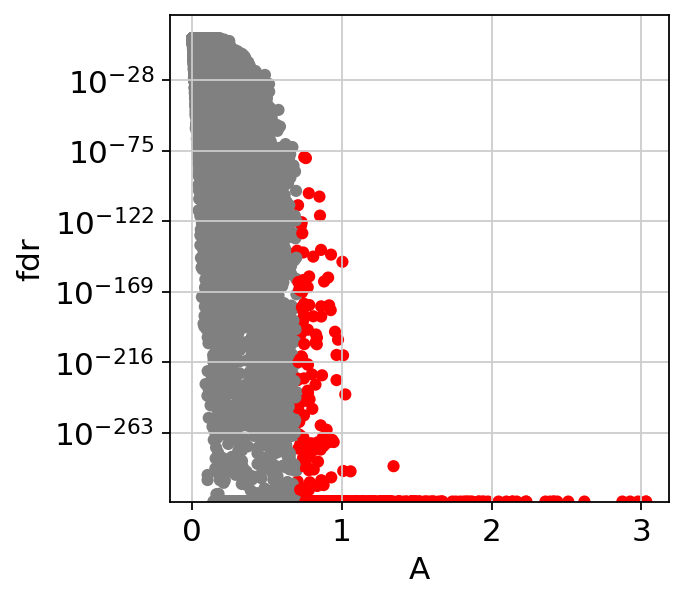

In [23]:
sc.set_figure_params()
scf.pl.test_association(adata)
plt.savefig("figures/C_v2.pdf",dpi=300)

In [24]:
scf.tl.fit(adata,n_jobs=20)

fit features associated with the trajectory
    single mapping :   0%|          | 0/541 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   0%|          | 2/541 [01:01<4:34:33, 30.56s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|          | 4/541 [01:01<2:17:56, 15.41s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   1%|▏         | 7/541 [01:03<1:20:56,  9.09s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 11/541 [01:05<52:22,  5.93s/it] 

by .GlobalEnv when processing object ‘aa’


    single mapping :   2%|▏         | 13/541 [01:06<44:41,  5.08s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :   3%|▎         | 15/541 [01:06<39:07,  4.46s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  19%|█▉        | 103/541 [01:48<07:39,  1.05s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  21%|██▏       | 115/541 [02:20<08:39,  1.22s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  23%|██▎       | 126/541 [02:37<08:38,  1.25s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  28%|██▊       | 154/541 [03:23<08:32,  1.32s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  29%|██▉       | 157/541 [03:24<08:21,  1.31s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  34%|███▍      | 186/541 [03:36<06:53,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  37%|███▋      | 199/541 [04:00<06:53,  1.21s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  39%|███▉      | 211/541 [04:25<06:54,  1.26s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  42%|████▏     | 228/541 [04:44<06:30,  1.25s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  44%|████▍     | 239/541 [04:50<06:06,  1.21s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  46%|████▌     | 250/541 [04:56<05:45,  1.19s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 259/541 [05:09<05:36,  1.19s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  48%|████▊     | 262/541 [05:10<05:30,  1.18s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  51%|█████     | 274/541 [05:32<05:23,  1.21s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  53%|█████▎    | 285/541 [05:40<05:05,  1.19s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  55%|█████▍    | 297/541 [06:00<04:55,  1.21s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  59%|█████▉    | 318/541 [06:09<04:19,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  61%|██████    | 330/541 [06:25<04:06,  1.17s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  65%|██████▌   | 354/541 [06:52<03:37,  1.17s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  68%|██████▊   | 366/541 [07:06<03:23,  1.17s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  70%|██████▉   | 378/541 [07:20<03:10,  1.17s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  72%|███████▏  | 389/541 [07:26<02:54,  1.15s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  74%|███████▍  | 401/541 [07:45<02:42,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  79%|███████▊  | 426/541 [08:14<02:13,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  81%|████████  | 439/541 [08:28<01:58,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  84%|████████▍ | 455/541 [08:46<01:39,  1.16s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  87%|████████▋ | 468/541 [08:53<01:23,  1.14s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  89%|████████▉ | 481/541 [09:18<01:09,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  91%|█████████ | 493/541 [09:37<00:56,  1.17s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  93%|█████████▎| 505/541 [09:44<00:41,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping :  95%|█████████▌| 516/541 [09:56<00:28,  1.16s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  97%|█████████▋| 527/541 [10:07<00:16,  1.15s/it]

by .GlobalEnv when processing object ‘aa’


    single mapping :  99%|█████████▊| 534/541 [10:12<00:08,  1.15s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|█████████▉| 539/541 [10:37<00:02,  1.18s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    single mapping : 100%|██████████| 541/541 [10:48<00:00,  1.20s/it]
    finished (adata subsetted to keep only fitted features!) (0:10:55) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

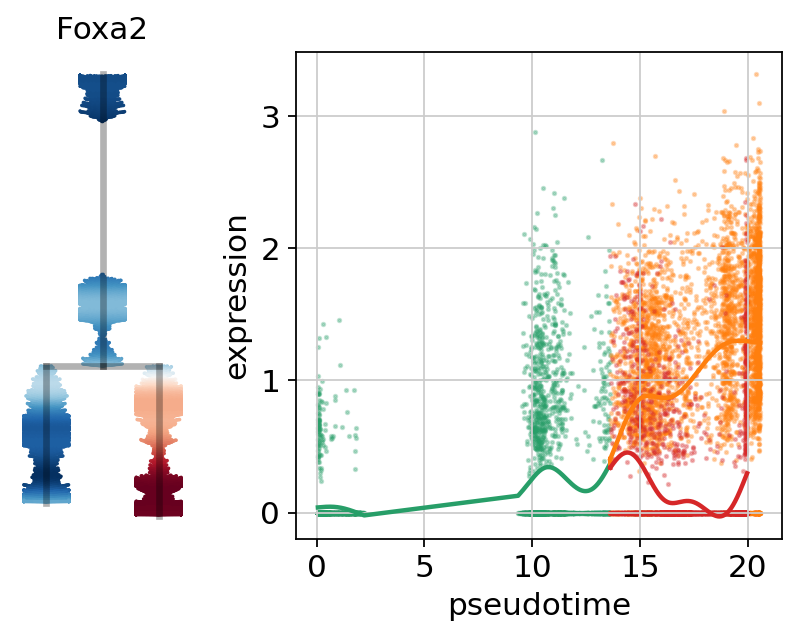

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

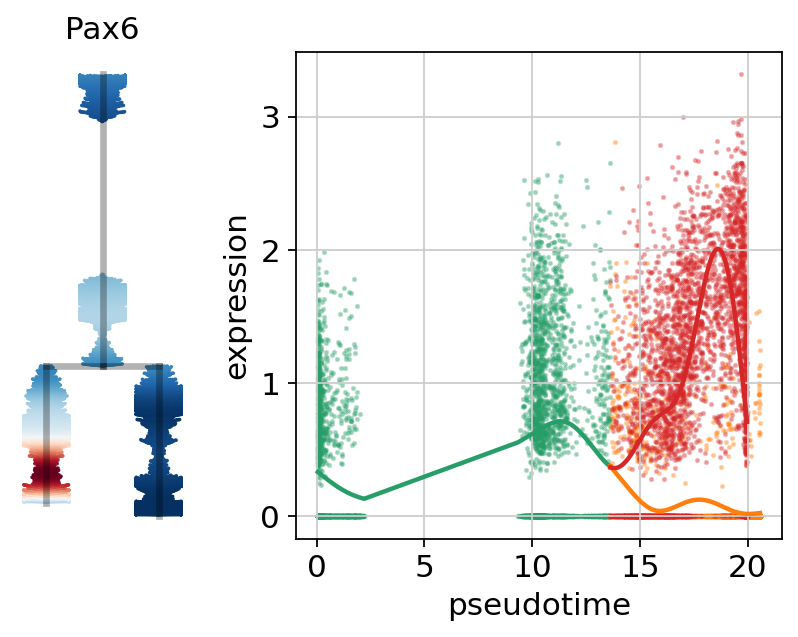

In [26]:
# Plotting single features
sc.set_figure_params(figsize=(.8,4),frameon=False)
scf.set_figure_pubready()
scf.pl.single_trend(adata,"Foxa2",basis="dendro",wspace=-.25,save="_E1.pdf")
scf.pl.single_trend(adata,"Pax6",basis="dendro",wspace=-.25,save="_E2.pdf")

In [27]:
outDir

'../results/scRNAseq_R13547_10x_mNT_20220813/RA_symetryBreaking/TF_modules/d2.5_d6_noMatureNeuron_filteredCellCycleGenes_v1.2/'

In [28]:
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2_trajectory_fit.h5ad'), compression="gzip")

In [45]:
adata = sc.read_h5ad(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_v2_trajectory_fit.h5ad'),chunk_size=6000)

In [29]:
adata.layers["fitted"]

array([[ 1.28849242e-01,  3.20281794e-01,  1.40812387e+00, ...,
        -2.29346765e-05,  9.73456115e-04, -2.52770266e-04],
       [ 1.31088595e-01,  3.20132139e-01,  1.41623536e+00, ...,
        -1.21591712e-04,  1.37471219e-03, -3.54481457e-04],
       [ 3.30068308e-02,  3.11465314e-01,  1.12967779e+00, ...,
         1.01192452e-03, -2.06507223e-03,  5.66747455e-04],
       ...,
       [-1.58525497e-02,  1.23084363e+00,  4.74783560e-01, ...,
         6.20611033e-01,  4.05586871e-01,  1.00578867e+00],
       [ 1.67766784e-02,  8.07622567e-02,  5.62161466e-01, ...,
         7.94922873e-03,  1.73113090e+00,  2.00686425e-02],
       [ 1.62563225e-02,  1.37282283e+00,  4.49624933e-01, ...,
         7.08241243e-01,  3.98007026e-01,  1.11371339e+00]])

In [30]:
adata

AnnData object with n_obs × n_vars = 12000 × 541
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'condition_colors', 'dendro_segments', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_pca_seurat', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    layers: 'fitted'
    obsp: 'connectivities', 'distances'

In [31]:
# All branches DE analysis
scf.tl.test_fork(adata,root_milestone="Root",milestones=["NP","FP"],n_jobs=20, rescale=True)

testing fork
    single mapping
    Differential expression:  12%|█▏        | 67/541 [00:48<05:44,  1.38it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  13%|█▎        | 71/541 [01:03<06:57,  1.13it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  13%|█▎        | 73/541 [01:24<09:01,  1.16s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  14%|█▎        | 74/541 [01:32<09:43,  1.25s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  24%|██▍       | 129/541 [02:06<06:42,  1.02it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  30%|███       | 164/541 [02:19<05:21,  1.17it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███       | 166/541 [02:33<05:46,  1.08it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  31%|███       | 168/541 [02:48<06:13,  1.00s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  32%|███▏      | 172/541 [03:03<06:33,  1.07s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  33%|███▎      | 179/541 [03:23<06:50,  1.13s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  48%|████▊     | 259/541 [03:57<04:18,  1.09it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  48%|████▊     | 261/541 [04:22<04:41,  1.01s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  49%|████▉     | 266/541 [04:28<04:37,  1.01s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  50%|████▉     | 268/541 [04:36<04:41,  1.03s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  50%|█████     | 271/541 [04:49<04:48,  1.07s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  54%|█████▍    | 292/541 [05:06<04:21,  1.05s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  63%|██████▎   | 341/541 [05:35<03:16,  1.02it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  64%|██████▎   | 344/541 [05:44<03:17,  1.00s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  65%|██████▍   | 351/541 [05:52<03:10,  1.01s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  66%|██████▌   | 358/541 [06:00<03:04,  1.01s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  66%|██████▋   | 359/541 [06:06<03:05,  1.02s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  67%|██████▋   | 363/541 [06:13<03:03,  1.03s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  67%|██████▋   | 365/541 [06:18<03:02,  1.04s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  68%|██████▊   | 369/541 [06:30<03:02,  1.06s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  74%|███████▍  | 402/541 [06:45<02:20,  1.01s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  77%|███████▋  | 414/541 [06:52<02:06,  1.00it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  79%|███████▊  | 426/541 [07:06<01:55,  1.00s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  82%|████████▏ | 441/541 [07:21<01:40,  1.00s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  82%|████████▏ | 445/541 [07:27<01:36,  1.00s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  83%|████████▎ | 448/541 [07:34<01:34,  1.01s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  83%|████████▎ | 450/541 [07:42<01:33,  1.03s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  84%|████████▍ | 454/541 [07:49<01:29,  1.03s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  84%|████████▍ | 455/541 [07:55<01:29,  1.05s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  86%|████████▋ | 467/541 [08:07<01:17,  1.04s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  89%|████████▉ | 482/541 [08:20<01:01,  1.04s/it]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  98%|█████████▊| 529/541 [08:35<00:11,  1.03it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  99%|█████████▊| 533/541 [08:42<00:07,  1.02it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  99%|█████████▊| 534/541 [08:48<00:06,  1.01it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  99%|█████████▉| 535/541 [08:51<00:05,  1.01it/s]

by .GlobalEnv when processing object ‘aa’


    Differential expression:  99%|█████████▉| 536/541 [08:56<00:05,  1.00s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression:  99%|█████████▉| 537/541 [09:00<00:04,  1.01s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    Differential expression: 100%|██████████| 541/541 [09:15<00:00,  1.03s/it]
    test for upregulation for each leave vs root
    upreg NP:  99%|█████████▉| 269/271 [00:09<00:00, 28.19it/s]

by .GlobalEnv when processing object ‘aa’


    upreg NP: 100%|█████████▉| 270/271 [00:45<00:00,  5.91it/s]

by .GlobalEnv when processing object ‘aa’


    upreg FP: 100%|█████████▉| 269/270 [00:00<00:00, 317.39it/s]

by .GlobalEnv when processing object ‘aa’


    upreg FP: 100%|██████████| 270/270 [00:46<00:00,  5.85it/s] 
    finished (0:11:00) --> added 
    .uns['Root->NP<>FP']['fork'], DataFrame with fork test results.


In [32]:
adata.write(os.path.join(outDir,'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_trajectory_fit_testFork.h5ad'), compression="gzip")

In [53]:
adata = sc.read_h5ad(os.path.join(outDir, 'scFates_pseudotime_mNT_d3_d5_after.test.asssociation_trajectory_fit_testFork.h5ad'),chunk_size=6000)

In [54]:
# test the thresholding parameters
scf.tl.branch_specific(adata,root_milestone="Root", milestones=["NP","FP"], effect= 0.4, copy = True)
#scf.tl.branch_specific(adata,root_milestone="Root",milestones=["NP", "FP"], effect=0.2)

    branch specific features: FP: 39, NP: 14
    finished --> updated 
    .uns['Root->NP<>FP']['fork'], DataFrame updated with additionnal 'branch' column.


AnnData object with n_obs × n_vars = 12000 × 541
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'condition', 'iscell_dd', 'cell.id', 'percent.mt', 'DF_out', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'celltypes', 'RNA_snn_res.0.5', 'seurat_clusters', 'RNA_snn_res.0.7', 'clusters', 'time', 'dataset', 'n_genes', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'Root->NP<>FP', 'condition_colors', 'dendro_segments', 'draw_graph', 'graph', 'hvg', 'milestones_colors', 'neighbors', 'pca', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_palantir', 'X_pca', 'X_pca2d', 'X_pca_seurat', 'X_umap', 'X_umap_seurat'
    varm: 'PCs'
    layers: 'fitted'
    obsp: 'connectivities', 'distances'

In [57]:
scf.tl.branch_specific(adata,root_milestone="Root", milestones=["NP","FP"], effect=0.4, copy = False)
#scf.tl.branch_specific(adata,root_milestone="Root",milestones=["NP", "FP"], effect=0.2)

    branch specific features: FP: 39, NP: 14
    finished --> updated 
    .uns['Root->NP<>FP']['fork'], DataFrame updated with additionnal 'branch' column.


In [58]:
# Displaying results using heatmap plots

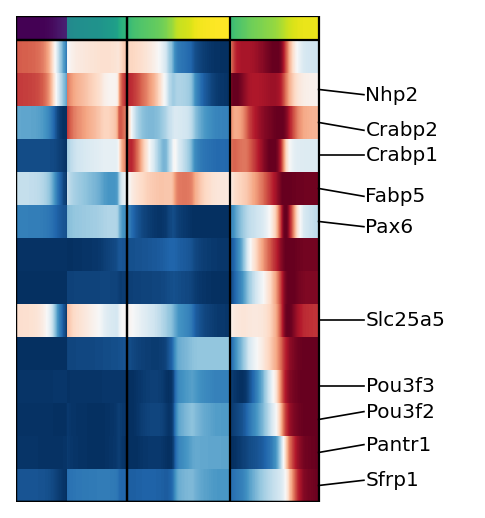

In [59]:
g1=scf.pl.trends(adata,
                 root_milestone="Root",
                 milestones=["NP","FP"],
                 branch="NP",
                 plot_emb=False,ordering="max",return_genes=True)


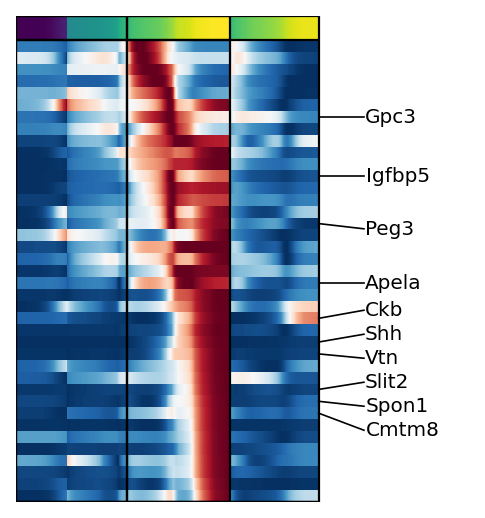

In [60]:
g2=scf.pl.trends(adata,
                 root_milestone="Root",
                 milestones=["NP", "FP"],
                 branch="FP",
                 plot_emb=False,ordering="max",return_genes=True)


In [61]:
gg=g1.tolist() + g2.tolist()

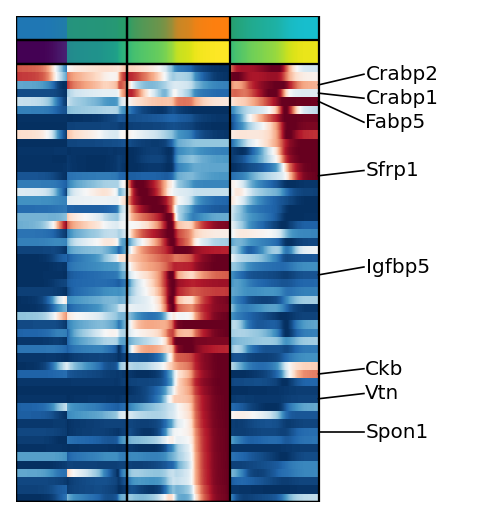

In [62]:
import matplotlib.pyplot as plt
g=scf.pl.trends(adata,gg,figsize=(4,4),annot="milestones",n_features=8,
        plot_emb=False,ordering=None,return_genes=True)
plt.savefig("figures/D.pdf",dpi=300)

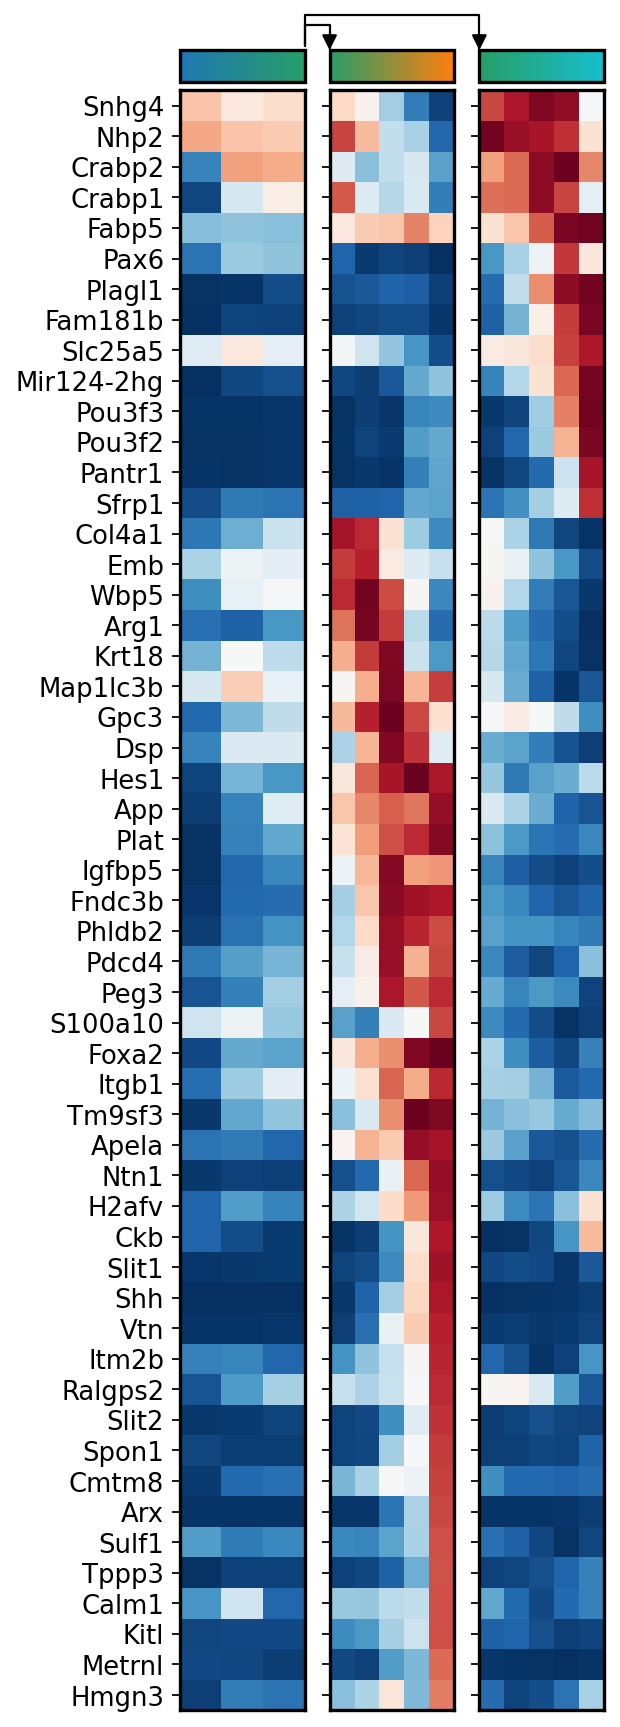

In [63]:
# Displaying results using matrix plot
sc.set_figure_params()
scf.pl.matrix(adata,gg,norm="minmax",cmap="RdBu_r",colorbar=False,save="_F.pdf")

In [64]:
# Bifurcation analysis

In [65]:
# scf.tl.test_fork(adata,root_milestone="Root",milestones=["NP", "FP"],n_jobs=20,rescale=True)

In [66]:
#scf.tl.branch_specific(adata,root_milestone="Root",milestones=["DC","Mono"],effect=1.7)

In [67]:
# Early gene detection
#scf.tl.activation_lm(adata,root_milestone="Root", milestones=["NP", "FP"], n_jobs=20)
scf.tl.activation_lm(adata,root_milestone="Root", milestones=["NP", "FP"], n_jobs=20, 
                    fdr_cut= 0.01, stf_cut = 0.7)

    single mapping
    prefork activation: 100%|██████████| 53/53 [00:00<00:00, 283.06it/s]
    7 early and 7 late features specific to leave NP
    27 early and 12 late features specific to leave FP
    finished (0:02:35) --> updated 
    .uns['Root->NP<>FP']['fork'], DataFrame updated with additionnal 'slope','pval','fdr','prefork_signi' and 'module' columns.


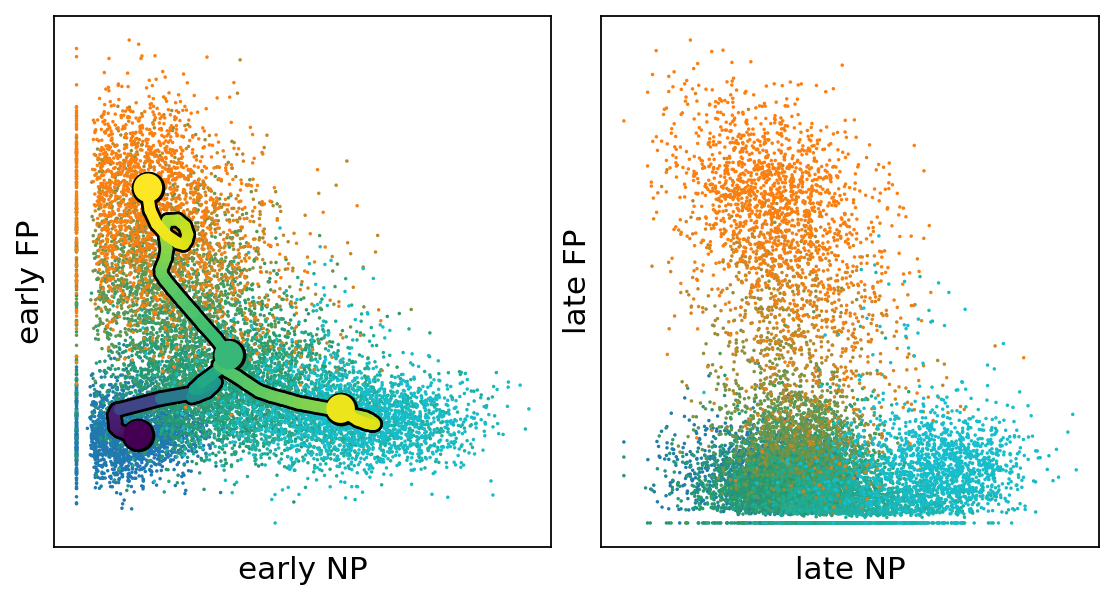

In [68]:
scf.pl.modules(adata,root_milestone="Root", milestones=["NP", "FP"],
               smooth=False, show_traj = True, module="all",save="_G_v2.pdf")

In [69]:
# extract the early and late modules
df=adata.uns["Root->NP<>FP"]["fork"].copy()
#df.index="\textit{"+df.index+"}"
eFP=df.index[(df.module=="early") & (df.branch=="FP")]
lFP=df.index[(df.module=="late") & (df.branch=="FP")]
eNP=df.index[(df.module=="early") & (df.branch=="NP")]
lNP=df.index[(df.module=="late") & (df.branch=="NP")]
import pandas as pd
dat=pd.DataFrame({'early FP': pd.Series(eFP), 
                  'late FP': pd.Series(lFP),
                  'early NP': pd.Series(eNP),
                  'late NP': pd.Series(lNP)})
dat=dat.fillna('')
dat

early FP  late FP    early NP  late NP
0     Igfbp5    Sulf1        Pax6   Pou3f3
1    Ralgps2  S100a10  Mir124-2hg  Slc25a5
2      Foxa2    Spon1      Crabp2    Fabp5
3       Gpc3     Kitl     Fam181b   Pou3f2
4       Wbp5    Apela      Plagl1     Nhp2
5     Fndc3b    Itm2b       Sfrp1    Snhg4
6      Slit2      Vtn      Crabp1   Pantr1
7       Peg3   Metrnl                     
8     Col4a1      Ckb                     
9       Plat     Arg1                     
10     Tppp3      Shh                     
11  Map1lc3b      Arx                     
12     Itgb1                              
13     Hmgn3                              
14     Cmtm8                              
15     H2afv                              
16      Ntn1                              
17       Dsp                              
18       Emb                              
19     Calm1                              
20     Krt18                              
21      Hes1                              
22    Phldb2                              
23       App                              
24    Tm9sf3                              
25     Pdcd4                              
26     Slit1

In [70]:
dat.to_csv(os.path.join(outDir, 'scFates_early_late_modules_NP_FP_tl.test.fork.rescaled_v2.csv'))
#with open(os.path.join(outDir + "scFates_early_late_modules_NP_FP.txt"), 'w') as f:
#        f.write(dat)

In [71]:
# Repulsion of early gene modules
scf.tl.slide_cells(adata,root_milestone="Root",milestones=["NP", "FP"],win=2000)

--> added 
    .uns['Root->NP<>FP']['cell_freq'], probability assignment of cells on 7 non intersecting windows.


In [72]:
scf.tl.slide_cors(adata,root_milestone="Root",milestones=["NP", "FP"])

--> added 
    .uns['Root->NP<>FP']['corAB'], gene-gene correlation modules.


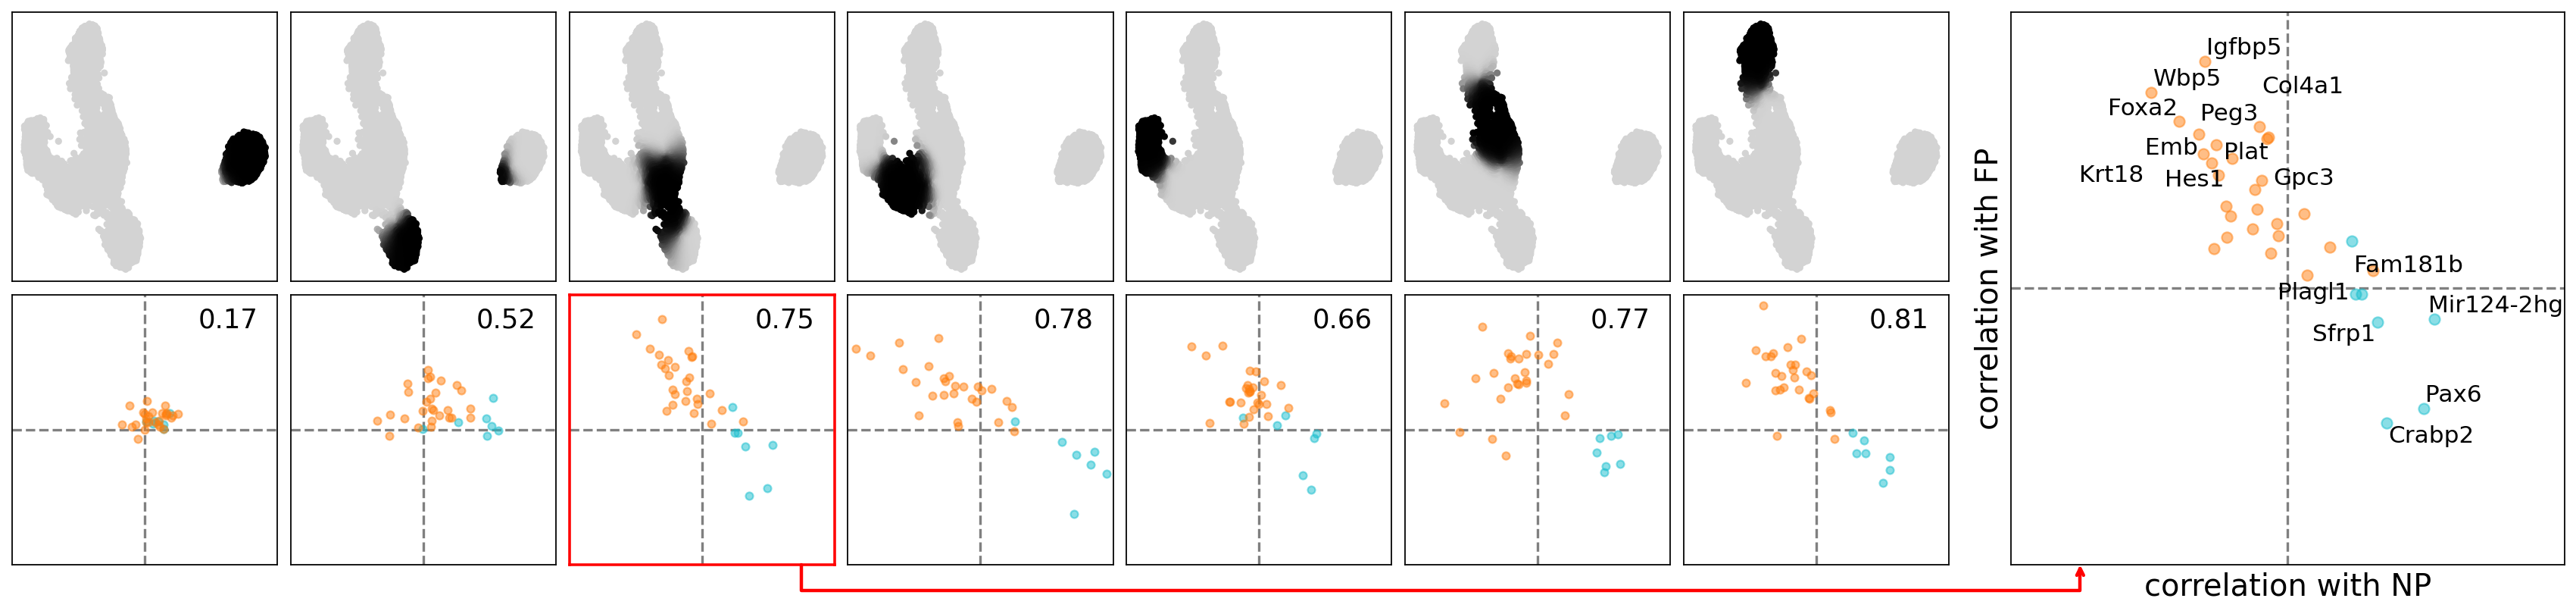

In [73]:
sc.set_figure_params()
scf.pl.slide_cors(adata,root_milestone="Root",milestones=["NP", "FP"],basis="umap", win_keep=[0,1,2,3,4,5,6],
                 focus=2, top_focus = 10, save="_H.pdf")

In [113]:
# Local trend of module correlations
scf.tl.synchro_path(adata,root_milestone="Root", milestones=["NP", "FP"],w=100,n_map=50,n_jobs=20)

computing local correlations
    multi mapping:   0%|          | 0/50 [00:00<?, ?it/s]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    multi mapping:   2%|▏         | 1/50 [01:32<1:15:46, 92.78s/it]

by .GlobalEnv when processing object ‘aa’
by .GlobalEnv when processing object ‘aa’


    multi mapping permutations: 100%|██████████| 50/50 [01:01<00:00,  1.24s/it]
    finished (0:03:17) --> added 
    .uns['Root->NP<>FP']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Root->NP<>FP'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


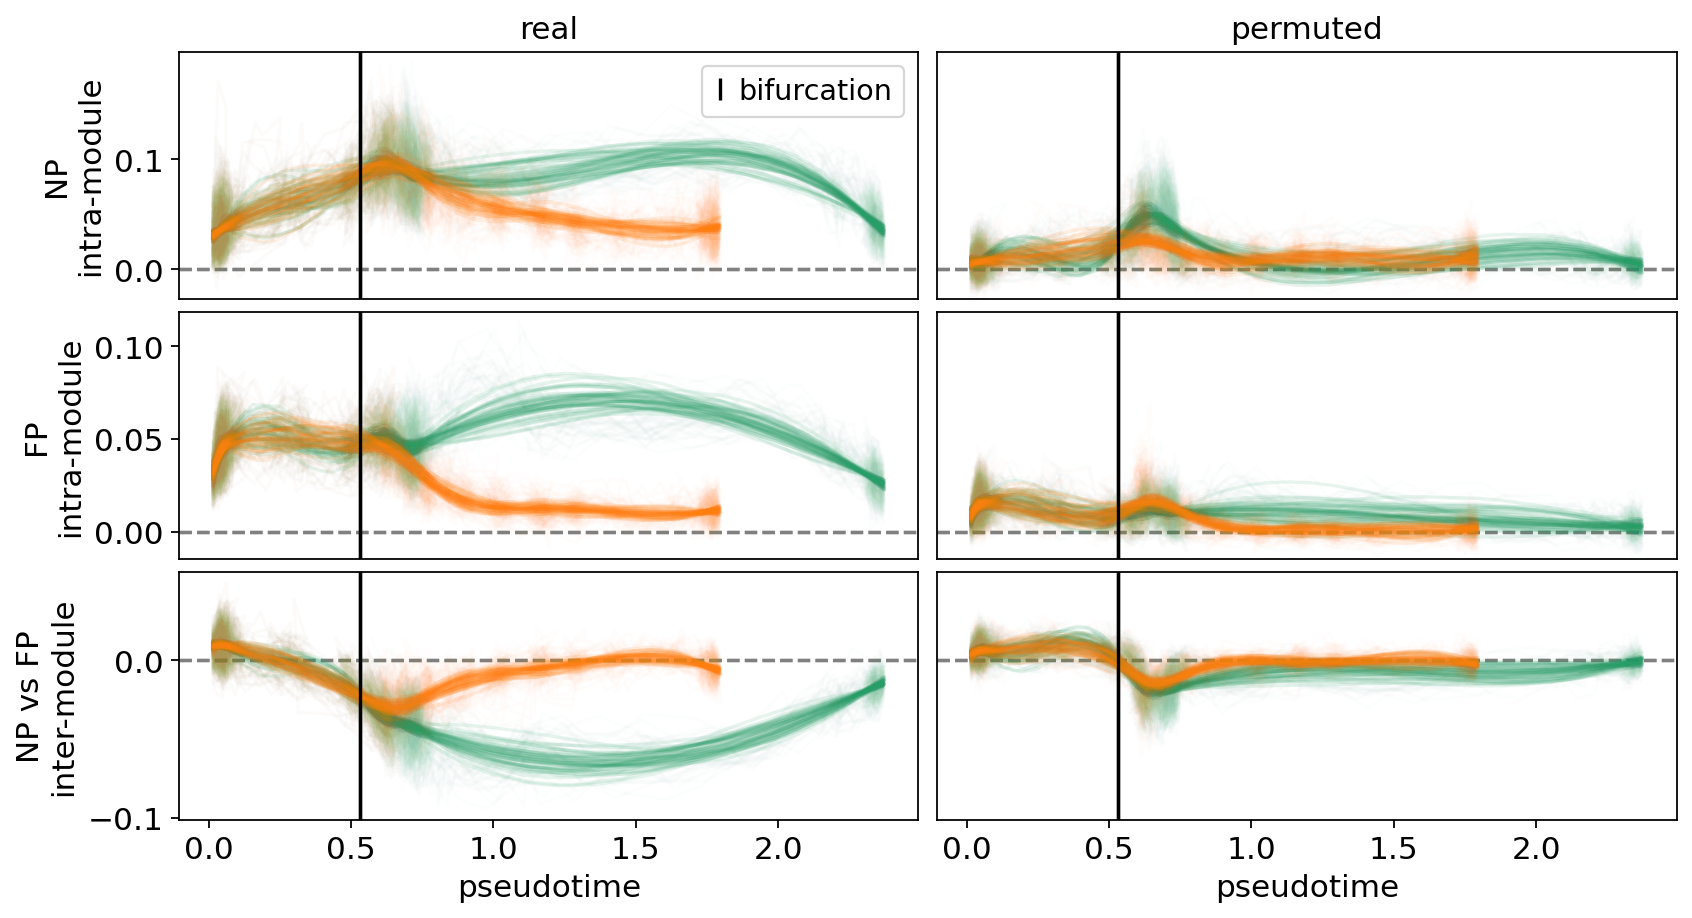

In [114]:
scf.pl.synchro_path(adata,root_milestone="Root", milestones=["NP", "FP"], save="_I.pdf")

In [48]:
# Formation of fate-specific modules

In [115]:
scf.tl.module_inclusion(adata,root_milestone="Root",milestones=["NP", "FP"], n_jobs=20,n_map=50, parallel_mode="mappings")

Calculating onset of features within their own module
    multi mapping: 100%|██████████| 50/50 [02:17<00:00,  2.75s/it]
    finished (0:02:17) --> added 
    .uns['Root->NP<>FP']['module_inclusion'], milestone specific dataframes containing inclusion timing for each gene in each probabilistic cells projection.
    .uns['Root->NP<>FP']['fork'] has been updated with the column 'inclusion'.


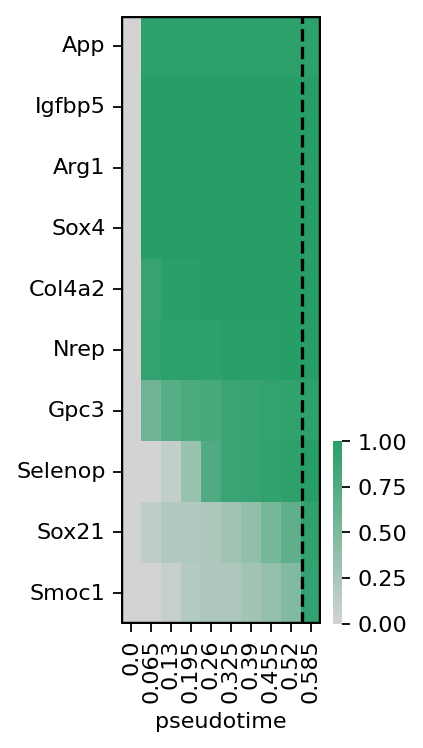

In [116]:
sc.set_figure_params(fontsize=10)
scf.pl.module_inclusion(adata,root_milestone="Root",milestones=["NP", "FP"],
                        bins=10,branch="NP",save="_J1.pdf",figsize=(2,5))

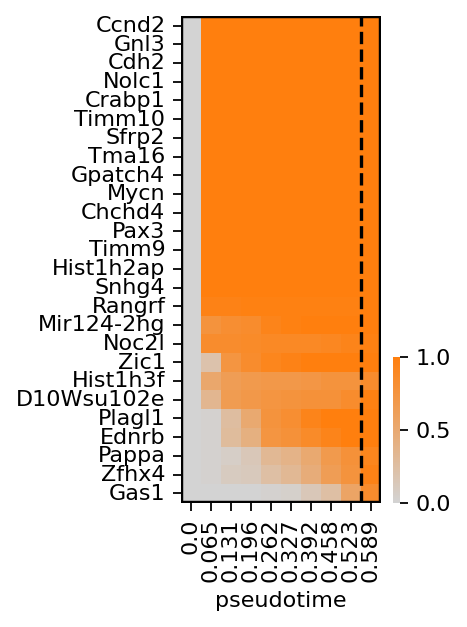

In [117]:
scf.pl.module_inclusion(adata,root_milestone="Root",milestones=["NP", "FP"],bins=10,branch="FP",
                       save="_J2.pdf",figsize=(2,4))